In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import re

In [2]:
os.getcwd()

'/Users/chuqiwang/Desktop/US_PFAS_Project/data_analysis'

In [19]:
all_states_df = pd.read_csv('all_states_pfas.csv', index_col=0)

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_80834/397138709.py:1: DtypeWarning: Columns (1,2,7,8,10,15,16,19,20,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  all_states_df = pd.read_csv('all_states_pfas.csv', index_col=0)


In [20]:
all_states_df[all_states_df['town'].isna() == False]['state'].unique()

array(['Massachusetts', 'Vermont'], dtype=object)

In [23]:
all_states_df.shape

(1394782, 25)

In [27]:
all_states_df.describe()

latitude      longitude     population  well_depth            MRL  \
count  444820.000000  444820.000000   67901.000000         0.0  831557.000000   
mean       35.482043    -119.259952    8266.003314         NaN       2.119717   
std         1.931414       1.760756   34601.236986         NaN       4.913110   
min        32.637758    -124.200600      25.000000         NaN       0.000000   
25%        33.998968    -121.309162     160.000000         NaN       1.800000   
50%        34.420339    -118.418263     897.000000         NaN       2.000000   
75%        37.303660    -117.933055    4424.000000         NaN       2.000000   
max        41.785547    -115.382326  590547.000000         NaN    2000.000000   

                  DL  concentration    pfas_total  
count  770983.000000   1.391440e+06  1.559300e+04  
mean        1.930817   9.205086e+00  6.598252e+03  
std         4.293593   1.663840e+03  1.098670e+05  
min        -0.577000   0.000000e+00  0.000000e+00  
25%         0.590000   0.000000e+00  0.000000e+00  
50%         0.680000   0.000000e+00  0.000000e+00  
75%         1.900000   0.000000e+00  4.840000e+00  
max       830.000000   1.066600e+06  2.454500e+06

In [28]:
all_states_df

sample_id                sampling_location data_source  latitude  \
0      XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
1      XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
2      XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
3      XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
4      XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
...            ...                              ...         ...       ...   
66528  22112120304       West Bend AASF #1 / Armory         DoD       NaN   
66529  22112120304       West Bend AASF #1 / Armory         DoD       NaN   
66530  22112120304       West Bend AASF #1 / Armory         DoD       NaN   
66531  22112120304       West Bend AASF #1 / Armory         DoD       NaN   
66532  22112120304       West Bend AASF #1 / Armory         DoD       NaN   

       longitude sampling_date pws_id water_system_name  population well_type  \
0            NaN    2022-09-28    NaN               NaN         NaN       NaN   
1            NaN    2022-09-28    NaN               NaN         NaN       NaN   
2            NaN    2022-09-28    NaN               NaN         NaN       NaN   
3            NaN    2022-09-28    NaN               NaN         NaN       NaN   
4            NaN    2022-09-28    NaN               NaN         NaN       NaN   
...          ...           ...    ...               ...         ...       ...   
66528        NaN    2021-12-07    NaN               NaN         NaN       NaN   
66529        NaN    2021-12-07    NaN               NaN         NaN       NaN   
66530        NaN    2021-12-07    NaN               NaN         NaN       NaN   
66531        NaN    2021-12-07    NaN               NaN         NaN       NaN   
66532        NaN    2021-12-07    NaN               NaN         NaN       NaN   

       ...  county MRL   DL analytical_methods is_detected   analyte  \
0      ...     NaN NaN  3.6            QSM_B15       False    4:2FTS   
1      ...     NaN NaN  3.6            QSM_B15       False    6:2FTS   
2      ...     NaN NaN  3.6            QSM_B15       False    8:2FTS   
3      ...     NaN NaN  3.6            QSM_B15       False  NETFOSAA   
4      ...     NaN NaN  7.0            QSM_B15       False   NMEFOSA   
...    ...     ...  ..  ...                ...         ...       ...   
66528  ...     NaN NaN  2.0            QSM_B15       False     PFPEA   
66529  ...     NaN NaN  3.0            QSM_B15       False     PFPES   
66530  ...     NaN NaN  3.0            QSM_B15       False    PFTEDA   
66531  ...     NaN NaN  3.0            QSM_B15       False    PFTRDA   
66532  ...     NaN NaN  3.0            QSM_B15       False     PFUNA   

       concentration  pfas_total note town  
0                0.0         NaN  NaN  NaN  
1                0.0         NaN  NaN  NaN  
2                0.0         NaN  NaN  NaN  
3                0.0         NaN  NaN  NaN  
4                0.0         NaN  NaN  NaN  
...              ...         ...  ...  ...  
66528            0.0         NaN  NaN  NaN  
66529            0.0         NaN  NaN  NaN  
66530            0.0         NaN  NaN  NaN  
66531            0.0         NaN  NaN  NaN  
66532            0.0         NaN  NaN  NaN  

[1394782 rows x 25 columns]

## Data Merging

In [29]:
pfas_analytes = ['PFHPA', 'PFOA', 'PFNA', 'PFBS', 'PFHXS', 'PFOS']

In [30]:
ak_df = pd.read_csv('../data_cleaning/Alaska/alaska_dw.csv', index_col=0)

In [31]:
az_df = pd.read_csv('../data_cleaning/Arizona/arizona_dw.csv', index_col=0)

In [32]:
ar_df = pd.read_csv('../data_cleaning/Arkansas/arkansas_dw.csv', index_col=0)

In [33]:
ca_df = pd.read_csv('../data_cleaning/California/california_dw.csv', index_col=0)

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_80834/1147726752.py:1: DtypeWarning: Columns (1,2,19) have mixed types. Specify dtype option on import or set low_memory=False.
  ca_df = pd.read_csv('../data_cleaning/California/california_dw.csv', index_col=0)


In [34]:
co_df = pd.read_csv('../data_cleaning/Colorado/colorado_dw.csv', index_col=0)

In [35]:
de_df = pd.read_csv('../data_cleaning/Delaware/delaware_dw.csv', index_col=0)

In [36]:
fl_df = pd.read_csv('../data_cleaning/Florida/florida_dw.csv', index_col=0)

In [37]:
ga_df = pd.read_csv('../data_cleaning/Georgia/georgia_dw.csv', index_col=0)

In [38]:
hi_df = pd.read_csv('../data_cleaning/Hawaii/hawaii_dw.csv', index_col=0)

In [39]:
il_df = pd.read_csv('../data_cleaning/Illinois/illinois_dw.csv', index_col=0)

In [40]:
in_df = pd.read_csv('../data_cleaning/Indiana/indiana_dw.csv', index_col=0)

In [41]:
ks_df = pd.read_csv('../data_cleaning/Kansas/kansas_dw.csv', index_col=0)

In [42]:
me_df = pd.read_csv('../data_cleaning/Maine/maine_dw.csv', index_col=0)

In [43]:
md_df = pd.read_csv('../data_cleaning/Maryland/maryland_dw.csv', index_col=0)

In [44]:
ma_df = pd.read_csv('../data_cleaning/Massachusetts/massachusetts_dw.csv', index_col=0)

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_80834/786706478.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ma_df = pd.read_csv('../data_cleaning/Massachusetts/massachusetts_dw.csv', index_col=0)


In [45]:
mi_df = pd.read_csv('../data_cleaning/Michigan/michigan_dw.csv', index_col=0)

In [46]:
mn_df = pd.read_csv('../data_cleaning/Minnesota/minnesota_dw.csv', index_col=0)

In [47]:
mt_df = pd.read_csv('../data_cleaning/Montana/montana_dw.csv', index_col=0)

In [48]:
nh_df = pd.read_csv('../data_cleaning/NewHampshire/newhampshire_dw.csv', index_col=0)

In [49]:
nj_df = pd.read_csv('../data_cleaning/NewJersey/newjersey_dw.csv', index_col=0)

In [50]:
nm_df = pd.read_csv('../data_cleaning/NewMexico/newmexico_dw.csv', index_col=0)

In [51]:
ny_df = pd.read_csv('../data_cleaning/NewYork/newyork_dw.csv', index_col=0)

In [52]:
nc_df = pd.read_csv('../data_cleaning/NorthCarolina/northcarolina_dw.csv', index_col=0)

In [53]:
nd_df = pd.read_csv('../data_cleaning/NorthDakota/northdakota_dw.csv', index_col=0)

In [54]:
oh_df = pd.read_csv('../data_cleaning/Ohio/ohio_dw.csv', index_col=0)

In [55]:
ok_df = pd.read_csv('../data_cleaning/Oklahoma/oklahoma_dw.csv', index_col=0)

In [56]:
or_df = pd.read_csv('../data_cleaning/Oregon/oregon_dw.csv', index_col=0)

In [57]:
pa_df = pd.read_csv('../data_cleaning/Pennsylvania/pennsylvania_dw.csv', index_col=0)

In [58]:
ri_df = pd.read_csv('../data_cleaning/RhodeIsland/rhodeisland_dw.csv', index_col=0)

In [59]:
sc_df = pd.read_csv('../data_cleaning/SouthCarolina/southcarolina_dw.csv', index_col=0)

In [60]:
sd_df = pd.read_csv('../data_cleaning/SouthDakota/southdakota_dw.csv', index_col=0)

In [61]:
tn_df = pd.read_csv('../data_cleaning/Tennessee/tennessee_dw.csv', index_col=0)

In [62]:
tx_df = pd.read_csv('../data_cleaning/Texas/texas_dw.csv', index_col=0)

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_80834/1619623374.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  tx_df = pd.read_csv('../data_cleaning/Texas/texas_dw.csv', index_col=0)


In [63]:
vt_df = pd.read_csv('../data_cleaning/Vermont/vermont_dw.csv', index_col=0)

In [64]:
va_df = pd.read_csv('../data_cleaning/Virginia/virginia_dw.csv', index_col=0)

In [65]:
wa_df = pd.read_csv('../data_cleaning/Washington/washington_dw.csv', index_col=0)

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_80834/1910683211.py:1: DtypeWarning: Columns (1,2,7,8,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  wa_df = pd.read_csv('../data_cleaning/Washington/washington_dw.csv', index_col=0)


In [66]:
wi_df = pd.read_csv('../data_cleaning/Wisconsin/wisconsin_dw.csv', index_col=0)

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_80834/927212605.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  wi_df = pd.read_csv('../data_cleaning/Wisconsin/wisconsin_dw.csv', index_col=0)


In [67]:
all_states_df = pd.concat([ak_df, az_df, ar_df, ca_df, co_df, de_df, fl_df, ga_df, hi_df, il_df, in_df, ks_df, me_df, md_df, ma_df, mi_df,
                          mn_df, mt_df, nh_df, nj_df, nm_df, ny_df, nc_df, nd_df, oh_df, ok_df, or_df, pa_df, ri_df, sc_df, sd_df, tn_df, 
                          tx_df, vt_df, va_df, wa_df, wi_df])

In [68]:
all_states_df.index = range(0, len(all_states_df))

In [70]:
all_states_df.shape

(1394782, 25)

In [71]:
all_states_df

sample_id                sampling_location data_source  latitude  \
0        XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
1        XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
2        XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
3        XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
4        XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
...              ...                              ...         ...       ...   
1394777  22112120304       West Bend AASF #1 / Armory         DoD       NaN   
1394778  22112120304       West Bend AASF #1 / Armory         DoD       NaN   
1394779  22112120304       West Bend AASF #1 / Armory         DoD       NaN   
1394780  22112120304       West Bend AASF #1 / Armory         DoD       NaN   
1394781  22112120304       West Bend AASF #1 / Armory         DoD       NaN   

         longitude sampling_date pws_id water_system_name  population  \
0              NaN    2022-09-28    NaN               NaN         NaN   
1              NaN    2022-09-28    NaN               NaN         NaN   
2              NaN    2022-09-28    NaN               NaN         NaN   
3              NaN    2022-09-28    NaN               NaN         NaN   
4              NaN    2022-09-28    NaN               NaN         NaN   
...            ...           ...    ...               ...         ...   
1394777        NaN    2021-12-07    NaN               NaN         NaN   
1394778        NaN    2021-12-07    NaN               NaN         NaN   
1394779        NaN    2021-12-07    NaN               NaN         NaN   
1394780        NaN    2021-12-07    NaN               NaN         NaN   
1394781        NaN    2021-12-07    NaN               NaN         NaN   

        well_type  ...  county MRL   DL analytical_methods is_detected  \
0             NaN  ...     NaN NaN  3.6            QSM_B15       False   
1             NaN  ...     NaN NaN  3.6            QSM_B15       False   
2             NaN  ...     NaN NaN  3.6            QSM_B15       False   
3             NaN  ...     NaN NaN  3.6            QSM_B15       False   
4             NaN  ...     NaN NaN  7.0            QSM_B15       False   
...           ...  ...     ...  ..  ...                ...         ...   
1394777       NaN  ...     NaN NaN  2.0            QSM_B15       False   
1394778       NaN  ...     NaN NaN  3.0            QSM_B15       False   
1394779       NaN  ...     NaN NaN  3.0            QSM_B15       False   
1394780       NaN  ...     NaN NaN  3.0            QSM_B15       False   
1394781       NaN  ...     NaN NaN  3.0            QSM_B15       False   

          analyte  concentration  pfas_total note town  
0          4:2FTS            0.0         NaN  NaN  NaN  
1          6:2FTS            0.0         NaN  NaN  NaN  
2          8:2FTS            0.0         NaN  NaN  NaN  
3        NETFOSAA            0.0         NaN  NaN  NaN  
4         NMEFOSA            0.0         NaN  NaN  NaN  
...           ...            ...         ...  ...  ...  
1394777     PFPEA            0.0         NaN  NaN  NaN  
1394778     PFPES            0.0         NaN  NaN  NaN  
1394779    PFTEDA            0.0         NaN  NaN  NaN  
1394780    PFTRDA            0.0         NaN  NaN  NaN  
1394781     PFUNA            0.0         NaN  NaN  NaN  

[1394782 rows x 25 columns]

In [72]:
all_states_df.to_csv('all_states_pfas.csv')

## All States PFAS Analysis:

In [73]:
all_states_df['data_source'].unique()

array(['DoD', 'ADEQ', 'GAMA-Division of Drinking Water', 'CDPHE',
       'Indiana Department of Environmental Management', 'Maine DWP',
       'MDE', 'MassGOV', 'NMED', 'DEQ',
       'PFAS Testing of Ohio Public Water Systems', 'OHA', 'DEP', 'DHEC',
       'TDEC', 'DWGWP', 'VIRGINIA DEPARTMENT OF HEALTH', 'DOH',
       'WISconsin Department of Natural Resources'], dtype=object)

In [74]:
ppl_df = pd.read_csv('ppl.csv', index_col=0)

In [75]:
ppl_df

sample_id             sampling_location data_source  latitude  \
0           NaN  Brookhaven/Aquadome Landfill         PPL       NaN   
1           NaN  Brookhaven/Aquadome Landfill         PPL       NaN   
2           NaN  Brookhaven/Aquadome Landfill         PPL       NaN   
3           NaN         Deer Springs Landfill         PPL       NaN   
4           NaN         Deer Springs Landfill         PPL       NaN   
...         ...                           ...         ...       ...   
6034        NaN     Cheyenne Regional Airport         PPL       NaN   
6035        NaN     Cheyenne Regional Airport         PPL       NaN   
6036        NaN    F.E. Warren Air Force Base         PPL       NaN   
6037        NaN    F.E. Warren Air Force Base         PPL       NaN   
6038        NaN    F.E. Warren Air Force Base         PPL       NaN   

      longitude  sampling_date  pws_id  water_system_name  population  \
0           NaN         2019.0     NaN                NaN         NaN   
1           NaN         2019.0     NaN                NaN         NaN   
2           NaN         2019.0     NaN                NaN         NaN   
3           NaN         2019.0     NaN                NaN         NaN   
4           NaN         2019.0     NaN                NaN         NaN   
...         ...            ...     ...                ...         ...   
6034        NaN         2018.0     NaN                NaN         NaN   
6035        NaN         2018.0     NaN                NaN         NaN   
6036        NaN         2017.0     NaN                NaN         NaN   
6037        NaN         2017.0     NaN                NaN         NaN   
6038        NaN         2017.0     NaN                NaN         NaN   

      well_type  ...  city county MRL  DL  analytical_methods  is_detected  \
0           NaN  ...   NaN    NaN NaN NaN                 NaN          NaN   
1           NaN  ...   NaN    NaN NaN NaN                 NaN         True   
2           NaN  ...   NaN    NaN NaN NaN                 NaN          NaN   
3           NaN  ...   NaN    NaN NaN NaN                 NaN          NaN   
4           NaN  ...   NaN    NaN NaN NaN                 NaN          NaN   
...         ...  ...   ...    ...  ..  ..                 ...          ...   
6034        NaN  ...   NaN    NaN NaN NaN                 NaN         True   
6035        NaN  ...   NaN    NaN NaN NaN                 NaN         True   
6036        NaN  ...   NaN    NaN NaN NaN                 NaN         True   
6037        NaN  ...   NaN    NaN NaN NaN                 NaN         True   
6038        NaN  ...   NaN    NaN NaN NaN                 NaN         True   

        analyte  concentration  pfas_total note  
0          PFOA            NaN         NaN  NaN  
1          PFOS         3770.0         NaN  NaN  
2     PFOA+PFOS            NaN         NaN  NaN  
3          PFOA            NaN    236000.0  NaN  
4          PFOS            NaN    236000.0  NaN  
...         ...            ...         ...  ...  
6034       PFOS        89000.0         NaN  NaN  
6035  PFOA+PFOS        94400.0         NaN  NaN  
6036       PFOA        72000.0    147000.0  NaN  
6037       PFOS        64000.0    147000.0  NaN  
6038  PFOA+PFOS       136000.0    147000.0  NaN  

[6039 rows x 24 columns]

In [85]:
ppl_df['source_type'].unique()

array(['Groundwater', 'Drinking Water', 'Soil', 'Surface Water',
       'Unknown', 'Leachate', 'Wastewater', 'Sludge', 'Compost',
       'Septage', nan], dtype=object)

In [76]:
ppl_df['sampling_date'] = ppl_df['sampling_date'].astype('Int64')

In [77]:
all_states_df_withppl = pd.concat([all_states_df, ppl_df])

In [78]:
ca_df[ca_df['analyte'].isin(pfas_analytes)].groupby('analyte')['concentration'].mean()

analyte
PFBS     10.037175
PFHPA     2.373311
PFHXS    64.349249
PFNA      0.489864
PFOA      6.375863
PFOS     13.706615
Name: concentration, dtype: float64

In [79]:
all_states_df_withppl['source_type'].unique()

array(['drinking water', 'DW', 'GW', 'SW', 'Eff', 'Groundwater Wells',
       'Surface Water', 'Spring Water', 'Groundwater', 'Drinking Water',
       'Soil', 'Unknown', 'Leachate', 'Wastewater', 'Sludge', 'Compost',
       'Septage', nan], dtype=object)

In [80]:
all_states_df['source_type'].unique()

array(['drinking water', 'DW', 'GW', 'SW', 'Eff', 'Groundwater Wells',
       'Surface Water', 'Spring Water'], dtype=object)

In [81]:
all_states_df_withppl['state'].unique()

array(['Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Illinois', 'Indiana',
       'Kansas', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Montana', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Vermont',
       'Virginia', 'Washington', 'Wisconsin', 'Alabama', 'Connecticut',
       'District of Columbia', 'Guam', 'Idaho', 'Iowa', 'Kentucky',
       'Louisiana', 'Marshall Islands', 'Mississippi', 'Missouri',
       'Nebraska', 'Nevada', nan, 'Puerto Rico',
       'Saipan, Commonwealth of the Northern Mariana Islands', 'Utah',
       'Virgin Islands', 'w', 'Wake Island', 'West Virginia', 'Wyoming'],
      dtype=object)

In [84]:
all_states_df[all_states_df['source_type'] == 'Eff']

sample_id                                  sampling_location  \
977800       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977801       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977802       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977803       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977804       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977805       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977806       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977807       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977808       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977809       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977810       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977811       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977812       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977813       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977814       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977815       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977816       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977817       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977818       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977819       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977820       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   
977821       NaN  HAFB Wastewater Treatment Plant Effluent, EF03003   

       data_source  latitude  longitude sampling_date pws_id  \
977800        NMED       NaN        NaN    2017-11-06    NaN   
977801        NMED       NaN        NaN    2017-11-06    NaN   
977802        NMED       NaN        NaN    2017-11-06    NaN   
977803        NMED       NaN        NaN    2017-11-06    NaN   
977804        NMED       NaN        NaN    2017-11-06    NaN   
977805        NMED       NaN        NaN    2017-11-06    NaN   
977806        NMED       NaN        NaN    2017-11-06    NaN   
977807        NMED       NaN        NaN    2017-11-06    NaN   
977808        NMED       NaN        NaN    2017-11-06    NaN   
977809        NMED       NaN        NaN    2017-11-06    NaN   
977810        NMED       NaN        NaN    2017-11-06    NaN   
977811        NMED       NaN        NaN    2017-11-06    NaN   
977812        NMED       NaN        NaN    2017-11-06    NaN   
977813        NMED       NaN        NaN    2017-11-06    NaN   
977814        NMED       NaN        NaN    2017-11-06    NaN   
977815        NMED       NaN        NaN    2017-11-06    NaN   
977816        NMED       NaN        NaN    2017-11-06    NaN   
977817        NMED       NaN        NaN    2017-11-06    NaN   
977818        NMED       NaN        NaN    2017-11-06    NaN   
977819        NMED       NaN        NaN    2017-11-06    NaN   
977820        NMED       NaN        NaN    2017-11-06    NaN   
977821        NMED       NaN        NaN    2017-11-06    NaN   

       water_system_name  population well_type  ...  county MRL  DL  \
977800               NaN         NaN       NaN  ...     NaN NaN NaN   
977801               NaN         NaN       NaN  ...     NaN NaN NaN   
977802               NaN         NaN       NaN  ...     NaN NaN NaN   
977803               NaN         NaN       NaN  ...     NaN NaN NaN   
977804               NaN         NaN       NaN  ...     NaN NaN NaN   
977805               NaN         NaN       NaN  ...     NaN NaN NaN   
977806               NaN         NaN       NaN  ...     NaN NaN NaN   
977807               NaN         NaN       NaN  ...     NaN NaN NaN   
977808               NaN         NaN       NaN  ...     NaN NaN NaN   
977809               NaN         NaN       NaN  ...     NaN NaN NaN   
977810               NaN         NaN       NaN  ...     NaN NaN NaN   
977811               NaN         NaN       NaN  

In [147]:
filtered_df = all_states_df_withppl[
    all_states_df_withppl['source_type'].isin(['DW', 'drinking water', 'Drinking Water']) &
    all_states_df_withppl['analyte'].isin(pfas_analytes)
]

grouped_df = filtered_df.groupby(['state', 'analyte'])['concentration'].mean().reset_index()

pivot_df = grouped_df.pivot(index='state', columns='analyte', values='concentration').reset_index()

pivot_df

analyte           state       PFBS      PFHPA       PFHXS      PFNA  \
0                Alaska   5.745000   1.849268   25.595122  0.104878   
1               Arizona   1.807692   0.800000    9.047692  0.000000   
2              Arkansas   2.445000   1.770000   46.175000  0.000000   
3            California  10.037175   2.373311   64.349249  0.489864   
4              Colorado  14.290361   5.318322   42.241514  0.534624   
5           Connecticut        NaN        NaN         NaN       NaN   
6              Delaware  20.775000   9.291071   94.862500  3.460714   
7               Florida   5.645433   2.759785    7.403150  0.351844   
8               Georgia   5.000000   1.733333   14.366667  0.000000   
9                  Guam        NaN        NaN         NaN       NaN   
10               Hawaii   0.530000   0.527778    0.848889  0.000000   
11             Illinois   0.000000   1.200000    4.757895  0.547368   
12              Indiana   0.533137   0.079478    0.197896  0.049854   
13               Kansas  22.656250   6.937500  123.156250  0.000000   
14            Louisiana        NaN        NaN         NaN       NaN   
15                Maine   6.597549   3.283689   44.162575  0.585904   
16             Maryland   3.591821   1.602460    4.208175  0.277302   
17        Massachusetts   2.102506   1.849213    2.160359  0.328471   
18             Michigan   1.227979   6.127673   26.289560  0.066550   
19            Minnesota   3.665846   2.390000   41.094462  0.000000   
20          Mississippi        NaN        NaN         NaN       NaN   
21             Missouri        NaN        NaN         NaN       NaN   
22              Montana   3.486000   4.515000   30.348250  0.050000   
23             Nebraska        NaN        NaN         NaN       NaN   
24        New Hampshire   5.624430   5.916759   41.674456  0.655063   
25           New Jersey   1.983593   1.697186   17.475808  0.156527   
26           New Mexico   0.820000   0.808571    1.276000  0.000000   
27             New York   2.131857  12.475571   10.207500  6.050100   
28       North Carolina   1.521778   0.286741    0.553185  0.057926   
29         North Dakota   0.066372   0.014139    0.059737  0.000000   
30                 Ohio   1.978202   1.015385   12.212022  0.012135   
31             Oklahoma   7.210909   1.683636   79.861818  0.000000   
32               Oregon   0.149847   0.188776    0.386735  0.000000   
33         Pennsylvania   3.633383   2.528306    3.544597  1.304916   
34          Puerto Rico        NaN        NaN         NaN       NaN   
35         Rhode Island   0.901486   1.247397    1.187644  0.270267   
36       South Carolina   4.755033   2.203611    7.393505  0.381628   
37         South Dakota  25.050733  15.094667  142.016540  0.578800   
38            Tennessee   0.000000  15.660000    0.000000  0.680000   
39                Texas  28.434995  16.349274  190.768697  0.557279   
40                 Utah        NaN        NaN         NaN       NaN   
41              Vermont   0.362523   0.225890    0.652437  0.192645   
42       Virgin Islands        NaN        NaN         NaN       NaN   
43             Virginia   1.075192   0.728980    2.243338  0.145576   
44           Washington   4.171716   2.301308   18.081996  0.170777   
45            Wisconsin   1.045935   0.444558    1.907599  0.108876   
46              Wyoming        NaN        NaN         NaN       NaN   

analyte       PFOA        PFOS  
0         6.430909  262.546222  
1         1.970000    8.728571  
2        19.115000   18.080000  
3         6.381548   13.717640  
4        10.068270   29.418803  
5              NaN         NaN  
6        11.923214  335.080357  
7         7.813446   15.783775  
8         2.850000   20.400000  
9              NaN  410.000000  
10        0.461111    0.976667  
11        9.742105   37.710526  
12        0.367603    0.237662  
13       21.681250   36.181250  
14             NaN         NaN  
15       16.453617   28.075802  
16        6.632167    6.513016

In [148]:
# filtered_df = all_states_df[
#     all_states_df['source_type'].isin(['DW', 'drinking water']) &
#     all_states_df['analyte'].isin(pfas_analytes)
# ]

# # Group by state, state_code (if you add it later), and analyte, then calculate the average concentration
# grouped_df = filtered_df.groupby(['state', 'analyte'])['concentration'].mean().reset_index()

# # Pivot the table to get the analytes as columns
# pivot_df = grouped_df.pivot(index='state', columns='analyte', values='concentration').reset_index()

# pivot_df

In [149]:
pivot_df = pivot_df.reindex(columns=['state'] + pfas_analytes).fillna(0)

In [150]:
state_code_mapping = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [151]:
pivot_df['state_code'] = pivot_df['state'].map(state_code_mapping)

# Reorder the columns so state_code is next to state
pivot_df = pivot_df[['state', 'state_code'] + pfas_analytes]

In [152]:
pivot_df = pivot_df.reset_index()  # Resetting the index if it was set incorrectly
pivot_df.columns.name = None

In [153]:
pivot_df = pivot_df.drop(columns=['index'])

In [154]:
pivot_df

state state_code      PFHPA       PFOA      PFNA       PFBS  \
0           Alaska         AK   1.849268   6.430909  0.104878   5.745000   
1          Arizona         AZ   0.800000   1.970000  0.000000   1.807692   
2         Arkansas         AR   1.770000  19.115000  0.000000   2.445000   
3       California         CA   2.373311   6.381548  0.489864  10.037175   
4         Colorado         CO   5.318322  10.068270  0.534624  14.290361   
5      Connecticut         CT   0.000000   0.000000  0.000000   0.000000   
6         Delaware         DE   9.291071  11.923214  3.460714  20.775000   
7          Florida         FL   2.759785   7.813446  0.351844   5.645433   
8          Georgia         GA   1.733333   2.850000  0.000000   5.000000   
9             Guam        NaN   0.000000   0.000000  0.000000   0.000000   
10          Hawaii         HI   0.527778   0.461111  0.000000   0.530000   
11        Illinois         IL   1.200000   9.742105  0.547368   0.000000   
12         Indiana         IN   0.079478   0.367603  0.049854   0.533137   
13          Kansas         KS   6.937500  21.681250  0.000000  22.656250   
14       Louisiana         LA   0.000000   0.000000  0.000000   0.000000   
15           Maine         ME   3.283689  16.453617  0.585904   6.597549   
16        Maryland         MD   1.602460   6.632167  0.277302   3.591821   
17   Massachusetts         MA   1.849213   4.832653  0.328471   2.102506   
18        Michigan         MI   6.127673   5.840821  0.066550   1.227979   
19       Minnesota         MN   2.390000  22.804118  0.000000   3.665846   
20     Mississippi         MS   0.000000   1.000000  0.000000   0.000000   
21        Missouri         MO   0.000000   0.000000  0.000000   0.000000   
22         Montana         MT   4.515000  16.283810  0.050000   3.486000   
23        Nebraska         NE   0.000000   1.000000  0.000000   0.000000   
24   New Hampshire         NH   5.916759  13.036465  0.655063   5.624430   
25      New Jersey         NJ   1.697186   3.682426  0.156527   1.983593   
26      New Mexico         NM   0.808571   0.000000  0.000000   0.820000   
27        New York         NY  12.475571  18.855887  6.050100   2.131857   
28  North Carolina         NC   0.286741   1.284191  0.057926   1.521778   
29    North Dakota         ND   0.014139   0.068633  0.000000   0.066372   
30            Ohio         OH   1.015385   3.239669  0.012135   1.978202   
31        Oklahoma         OK   1.683636   8.430357  0.000000   7.210909   
32          Oregon         OR   0.188776   0.179648  0.000000   0.149847   
33    Pennsylvania         PA   2.528306   7.569147  1.304916   3.633383   
34     Puerto Rico        NaN   0.000000   2.000000  0.000000   0.000000   
35    Rhode Island         RI   1.247397  16.062953  0.270267   0.901486   
36  South Carolina         SC   2.203611  11.085119  0.381628   4.755033   
37    South Dakota         SD  15.094667  26.881667  0.578800  25.050733   
38       Tennessee         TN  15.660000  37.940000  0.680000   0.000000   
39           Texas         TX  16.349274  61.718535  0.557279  28.434995   
40            Utah         UT   0.000000   3.000000  0.000000   0.000000   
41         Vermont         VT   0.225890   1.043225  0.192645   0.362523   
42  Virgin Islands        NaN   0.000000   0.000000  0.000000   0.000000   
43        Virginia         VA   0.728980   4.660347  0.145576   1.075192   
44      Washington         WA   2.301308   6.811734  0.170777   4.171716   
45       Wisconsin         WI   0.444558   1.300227  0.108876   1.045935   
46         Wyoming         WY   0.000000   1.000000  0.000000   0.000000   

         PFHXS        PFOS  
0    25.595122  262.546222  
1     9.047692    8.728571  
2    46.175000   18.080000  
3    64.349249   13.717640  
4    42.241514   29.418803  
5     0.000000    0.000000  
6    94.862500  335.080357  
7     7.403150   15.783775  
8    14.366667   20.400000  
9     0.000000  410.000000  
10    0.848889    0.976667  
11    4.757895  

In [155]:
pivot_df = pivot_df.dropna(subset=['state_code'])

In [156]:
pivot_df.to_csv('6pfas_avg_dw.csv')

In [157]:
state_coordinates = {
    'AL': [32.806671, -86.791130],
    'AK': [61.370716, -152.404419],
    'AZ': [33.729759, -111.431221],
    'AR': [34.969704, -92.373123],
    'CA': [36.116203, -119.681564],
    'CO': [39.059811, -105.311104],
    'CT': [41.597782, -72.755371],
    'DE': [39.318523, -75.507141],
    'FL': [27.766279, -81.686783],
    'GA': [33.040619, -83.643074],
    'HI': [21.094318, -157.498337],
    'ID': [44.240459, -114.478828],
    'IL': [40.349457, -88.986137],
    'IN': [39.849426, -86.258278],
    'IA': [42.011539, -93.210526],
    'KS': [38.526600, -96.726486],
    'KY': [37.668140, -84.670067],
    'LA': [31.169546, -91.867805],
    'ME': [44.693947, -69.381927],
    'MD': [39.063946, -76.802101],
    'MA': [42.230171, -71.530106],
    'MI': [43.326618, -84.536095],
    'MN': [45.694454, -93.900192],
    'MS': [32.741646, -89.678696],
    'MO': [38.456085, -92.288368],
    'MT': [46.921925, -110.454353],
    'NE': [41.125370, -98.268082],
    'NV': [38.313515, -117.055374],
    'NH': [43.452492, -71.563896],
    'NJ': [40.298904, -74.521011],
    'NM': [34.840515, -106.248482],
    'NY': [42.165726, -74.948051],
    'NC': [35.630066, -79.806419],
    'ND': [47.528912, -99.784012],
    'OH': [40.388783, -82.764915],
    'OK': [35.565342, -96.928917],
    'OR': [44.572021, -122.070938],
    'PA': [40.590752, -77.209755],
    'RI': [41.680893, -71.511780],
    'SC': [33.856892, -80.945007],
    'SD': [44.299782, -99.438828],
    'TN': [35.747845, -86.692345],
    'TX': [31.054487, -97.563461],
    'UT': [40.150032, -111.862434],
    'VT': [44.045876, -72.710686],
    'VA': [37.769337, -78.169968],
    'WA': [47.400902, -121.490494],
    'WV': [38.491226, -80.954456],
    'WI': [44.268543, -89.616508],
    'WY': [42.755966, -107.302490]
}


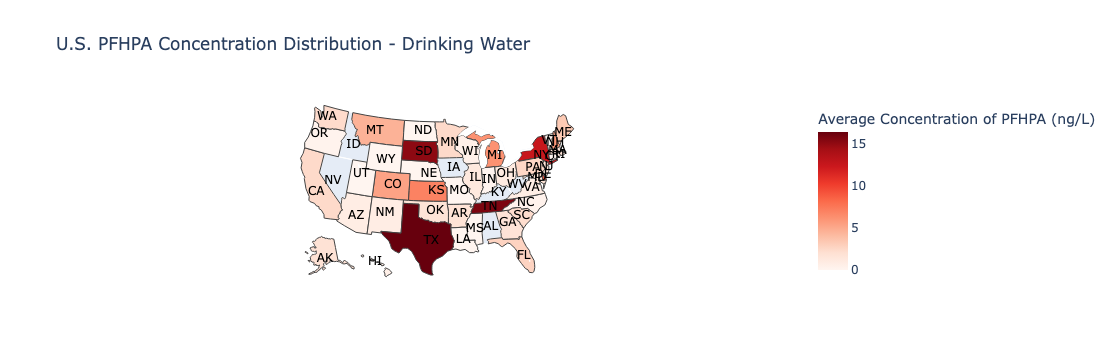

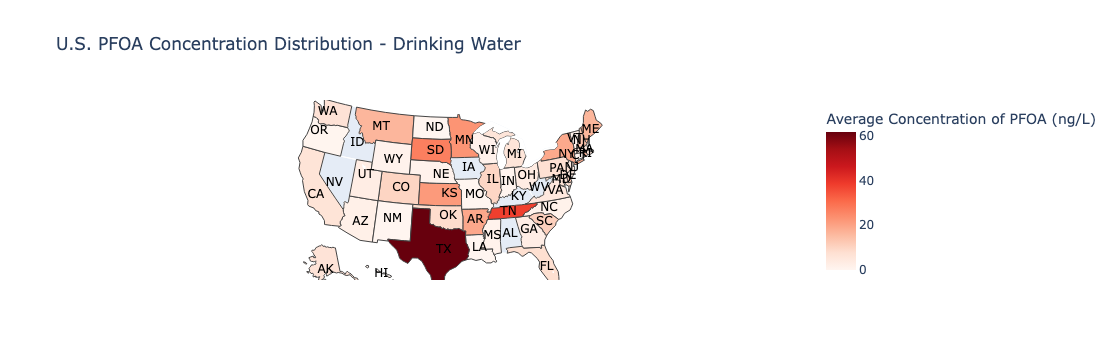

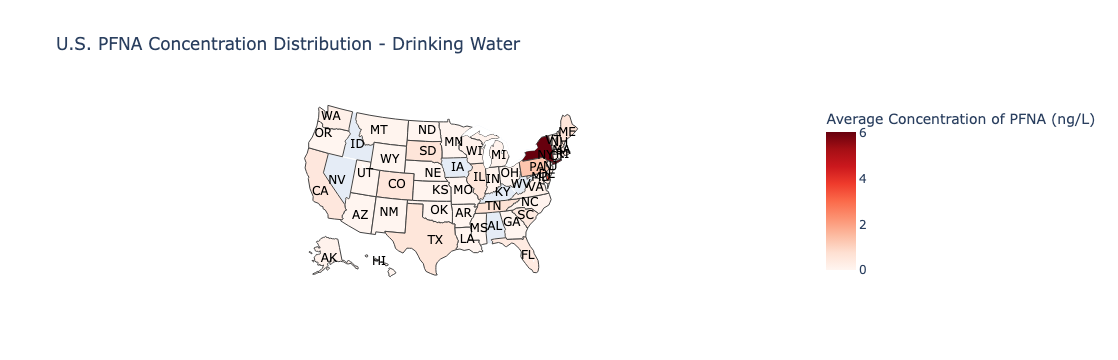

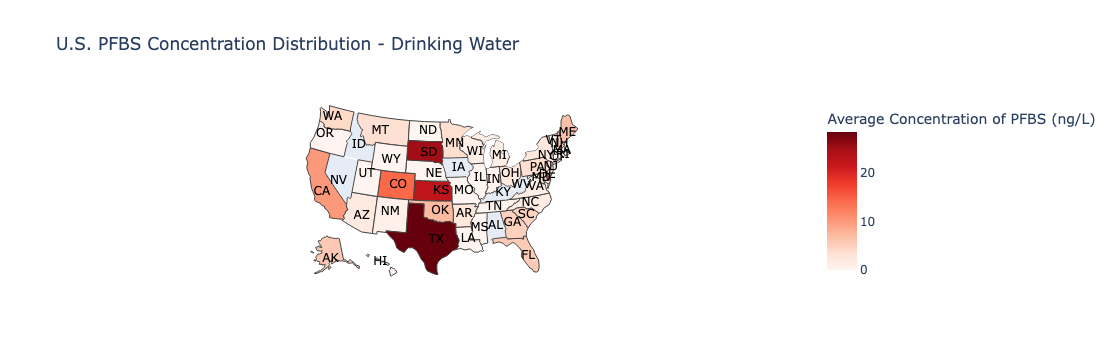

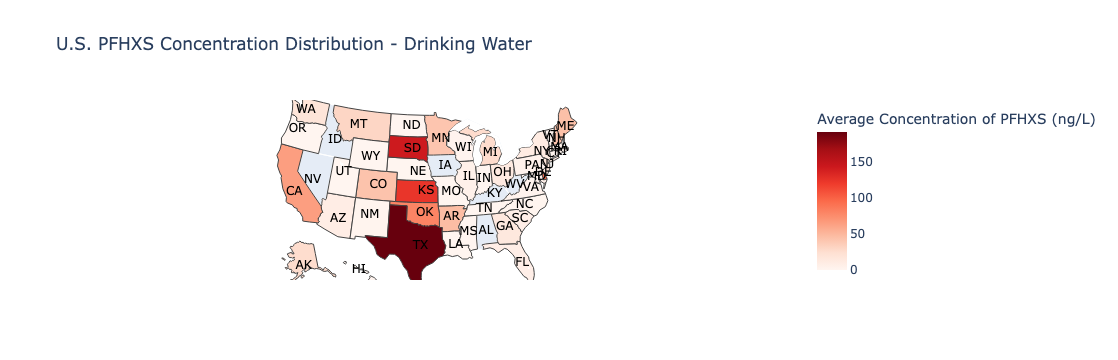

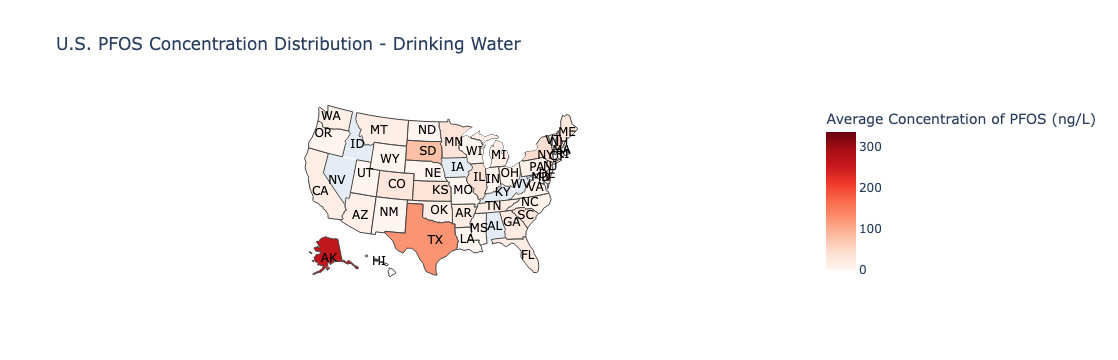

In [158]:
# Generate and save an HTML map for each analyte
for analyte in pfas_analytes:
    fig = px.choropleth(
        pivot_df, 
        locations='state_code',  # The column with state abbreviations (e.g., 'CA', 'TX')
        locationmode="USA-states",  # Use the USA state map
        color=analyte,  # The PFAS analyte column to visualize
        hover_name='state',  # The column to show on hover (state names)
        scope="usa",  # Focus the map on the USA
        color_continuous_scale="Reds",  # Color scale for concentrations
        labels={analyte: f'Average Concentration of {analyte} (ng/L)'},
        title=f'U.S. {analyte} Concentration Distribution'
    )
    
    # Customize the layout
    fig.update_layout(
        title_text=f'U.S. {analyte} Concentration Distribution - Drinking Water',
        geo=dict(
            lakecolor='rgb(255, 255, 255)',  # Set the color of lakes to white
        )
    )

    # Add state code annotations
    for state, coords in state_coordinates.items():
        fig.add_trace(go.Scattergeo(
            locationmode='USA-states',
            lon=[coords[1]],
            lat=[coords[0]],
            text=state,
            mode='text',
            showlegend=False,
            textfont=dict(
                size=12,
                color='black'
            )
        ))
    fig.write_html(f'{analyte}_concentration_map.html')
    # Show the map
    fig.show()

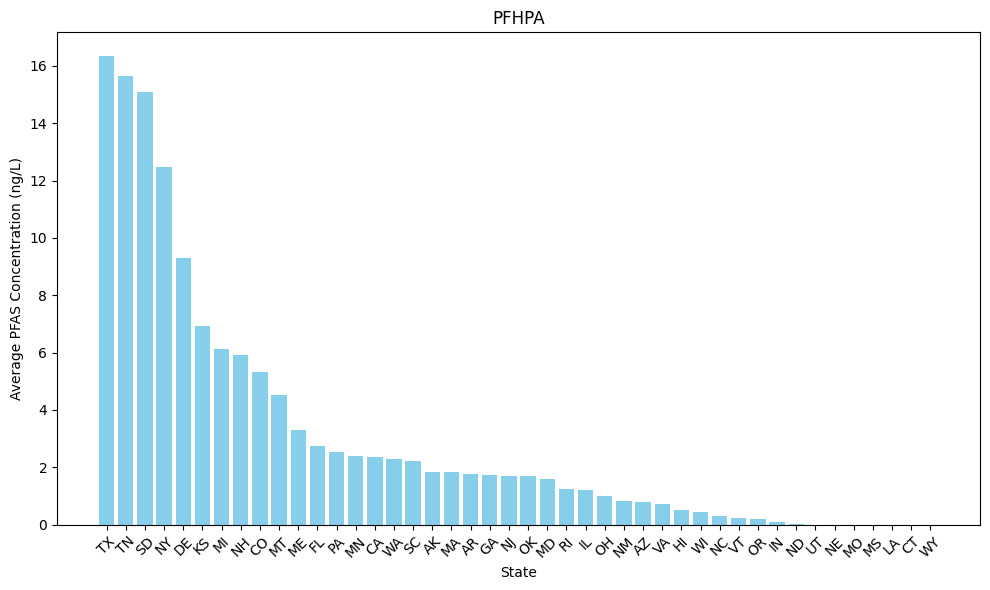

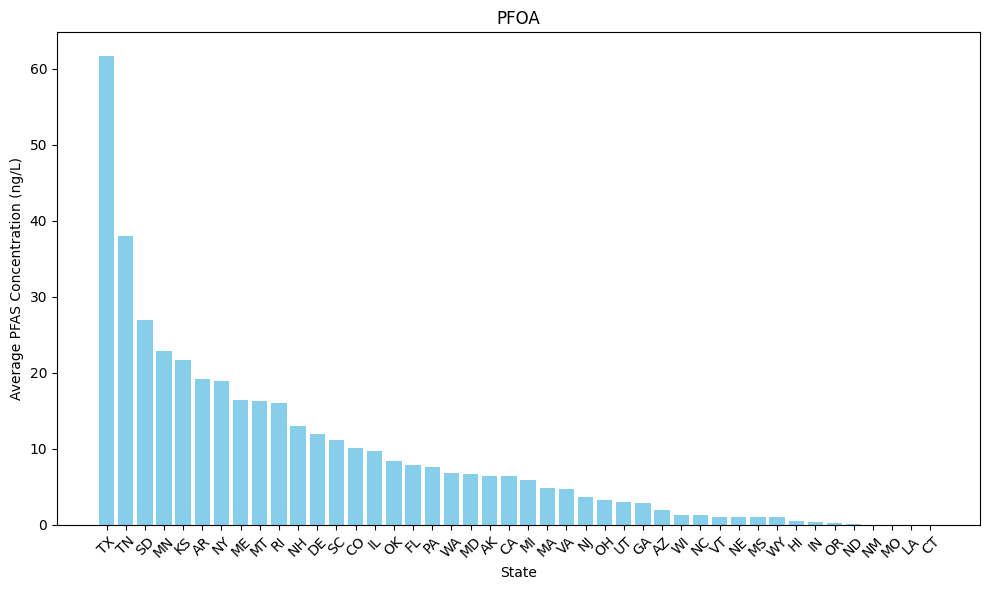

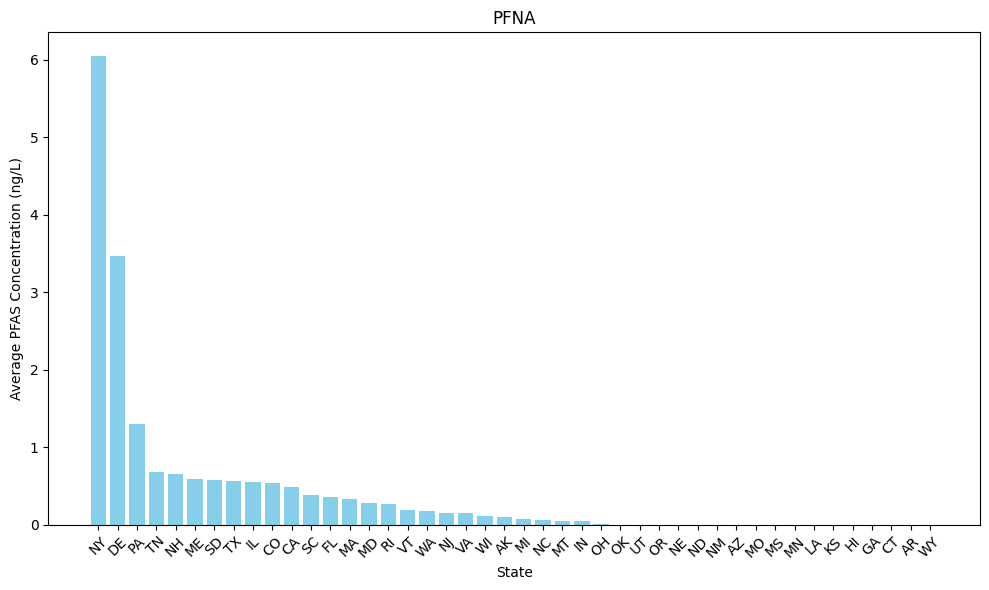

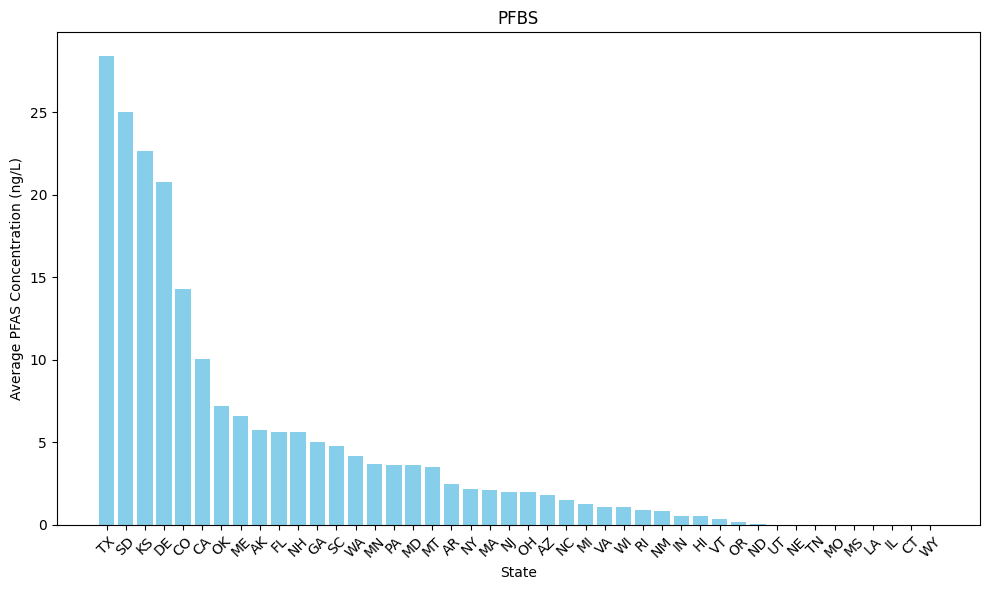

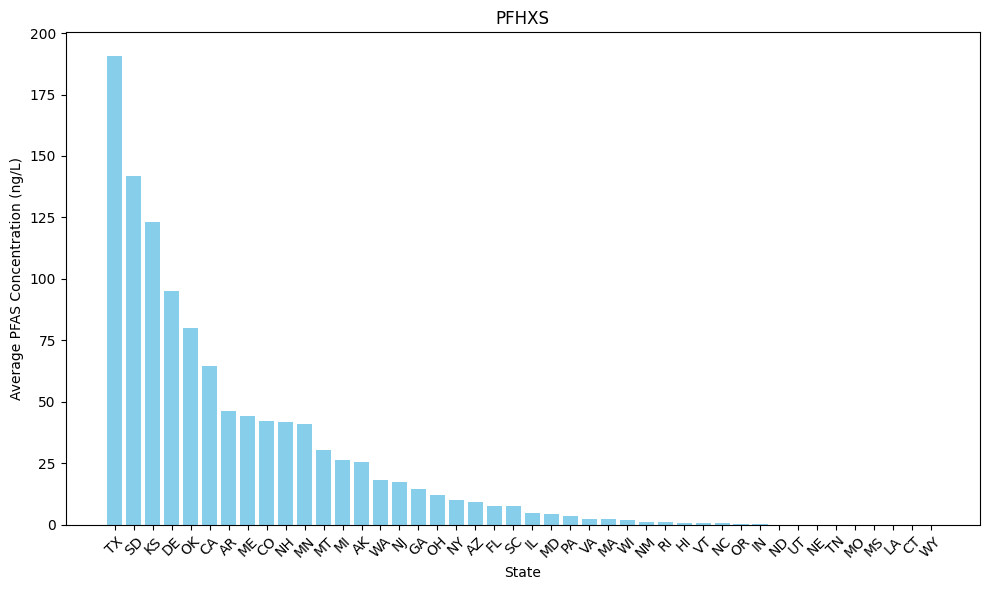

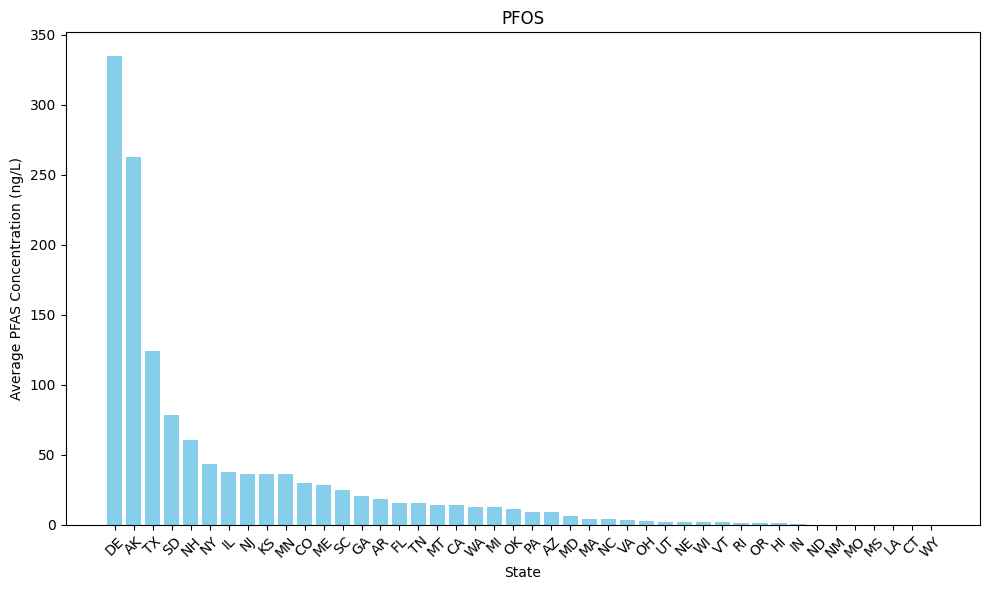

In [159]:
for analyte in pfas_analytes:
    # Sort the dataframe by the analyte concentration from high to low
    sorted_df = pivot_df.sort_values(by=analyte, ascending=False)
    
    # Plot the bar chart with a single color for all bars
    plt.figure(figsize=(10, 6))
    plt.bar(
        sorted_df['state_code'], 
        sorted_df[analyte], 
        color='skyblue',  # Specify the color you want
    )
    
    plt.xlabel('State')
    plt.ylabel('Average PFAS Concentration (ng/L)')
    plt.title(analyte)
    plt.xticks(rotation=45)  # Rotate state labels for better readability
    plt.tight_layout()
    plt.show()

In [160]:
all_states_df_withppl['units'].unique()

array(['ng/L'], dtype=object)

In [161]:
all_states_df['units'].unique()

array(['ng/L'], dtype=object)

In [162]:
ppl_df

sample_id             sampling_location data_source  latitude  \
0           NaN  Brookhaven/Aquadome Landfill         PPL       NaN   
1           NaN  Brookhaven/Aquadome Landfill         PPL       NaN   
2           NaN  Brookhaven/Aquadome Landfill         PPL       NaN   
3           NaN         Deer Springs Landfill         PPL       NaN   
4           NaN         Deer Springs Landfill         PPL       NaN   
...         ...                           ...         ...       ...   
6034        NaN     Cheyenne Regional Airport         PPL       NaN   
6035        NaN     Cheyenne Regional Airport         PPL       NaN   
6036        NaN    F.E. Warren Air Force Base         PPL       NaN   
6037        NaN    F.E. Warren Air Force Base         PPL       NaN   
6038        NaN    F.E. Warren Air Force Base         PPL       NaN   

      longitude  sampling_date  pws_id  water_system_name  population  \
0           NaN           2019     NaN                NaN         NaN   
1           NaN           2019     NaN                NaN         NaN   
2           NaN           2019     NaN                NaN         NaN   
3           NaN           2019     NaN                NaN         NaN   
4           NaN           2019     NaN                NaN         NaN   
...         ...            ...     ...                ...         ...   
6034        NaN           2018     NaN                NaN         NaN   
6035        NaN           2018     NaN                NaN         NaN   
6036        NaN           2017     NaN                NaN         NaN   
6037        NaN           2017     NaN                NaN         NaN   
6038        NaN           2017     NaN                NaN         NaN   

      well_type  ...  city county MRL  DL  analytical_methods  is_detected  \
0           NaN  ...   NaN    NaN NaN NaN                 NaN          NaN   
1           NaN  ...   NaN    NaN NaN NaN                 NaN         True   
2           NaN  ...   NaN    NaN NaN NaN                 NaN          NaN   
3           NaN  ...   NaN    NaN NaN NaN                 NaN          NaN   
4           NaN  ...   NaN    NaN NaN NaN                 NaN          NaN   
...         ...  ...   ...    ...  ..  ..                 ...          ...   
6034        NaN  ...   NaN    NaN NaN NaN                 NaN         True   
6035        NaN  ...   NaN    NaN NaN NaN                 NaN         True   
6036        NaN  ...   NaN    NaN NaN NaN                 NaN         True   
6037        NaN  ...   NaN    NaN NaN NaN                 NaN         True   
6038        NaN  ...   NaN    NaN NaN NaN                 NaN         True   

        analyte  concentration  pfas_total note  
0          PFOA            NaN         NaN  NaN  
1          PFOS         3770.0         NaN  NaN  
2     PFOA+PFOS            NaN         NaN  NaN  
3          PFOA            NaN    236000.0  NaN  
4          PFOS            NaN    236000.0  NaN  
...         ...            ...         ...  ...  
6034       PFOS        89000.0         NaN  NaN  
6035  PFOA+PFOS        94400.0         NaN  NaN  
6036       PFOA        72000.0    147000.0  NaN  
6037       PFOS        64000.0    147000.0  NaN  
6038  PFOA+PFOS       136000.0    147000.0  NaN  

[6039 rows x 24 columns]

In [163]:
all_states_dw = all_states_df_withppl[all_states_df_withppl['source_type'].isin(['DW', 'drinking water', 'Drinking Water'])]

In [164]:
all_states_dw

sample_id                sampling_location data_source  latitude  \
0     XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
1     XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
2     XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
3     XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
4     XJ04025-001  Joint Base Elmendorf-Richardson         DoD       NaN   
...           ...                              ...         ...       ...   
5959          NaN                 Hayward TNG Site         PPL       NaN   
5960          NaN                 Hayward TNG Site         PPL       NaN   
6027          NaN                    Camp Guernsey         PPL       NaN   
6028          NaN                    Camp Guernsey         PPL       NaN   
6029          NaN                    Camp Guernsey         PPL       NaN   

      longitude sampling_date pws_id water_system_name  population well_type  \
0           NaN    2022-09-28    NaN               NaN         NaN       NaN   
1           NaN    2022-09-28    NaN               NaN         NaN       NaN   
2           NaN    2022-09-28    NaN               NaN         NaN       NaN   
3           NaN    2022-09-28    NaN               NaN         NaN       NaN   
4           NaN    2022-09-28    NaN               NaN         NaN       NaN   
...         ...           ...    ...               ...         ...       ...   
5959        NaN          2018    NaN               NaN         NaN       NaN   
5960        NaN          2018    NaN               NaN         NaN       NaN   
6027        NaN          2018    NaN               NaN         NaN       NaN   
6028        NaN          2018    NaN               NaN         NaN       NaN   
6029        NaN          2018    NaN               NaN         NaN       NaN   

      ...  county MRL   DL analytical_methods is_detected    analyte  \
0     ...     NaN NaN  3.6            QSM_B15       False     4:2FTS   
1     ...     NaN NaN  3.6            QSM_B15       False     6:2FTS   
2     ...     NaN NaN  3.6            QSM_B15       False     8:2FTS   
3     ...     NaN NaN  3.6            QSM_B15       False   NETFOSAA   
4     ...     NaN NaN  7.0            QSM_B15       False    NMEFOSA   
...   ...     ...  ..  ...                ...         ...        ...   
5959  ...     NaN NaN  NaN                NaN         NaN       PFOS   
5960  ...     NaN NaN  NaN                NaN         NaN  PFOA+PFOS   
6027  ...     NaN NaN  NaN                NaN        True       PFOA   
6028  ...     NaN NaN  NaN                NaN         NaN       PFOS   
6029  ...     NaN NaN  NaN                NaN         NaN  PFOA+PFOS   

      concentration  pfas_total note town  
0               0.0         NaN  NaN  NaN  
1               0.0         NaN  NaN  NaN  
2               0.0         NaN  NaN  NaN  
3               0.0         NaN  NaN  NaN  
4               0.0         NaN  NaN  NaN  
...             ...         ...  ...  ...  
5959            NaN         1.0  NaN  NaN  
5960            NaN         1.0  NaN  NaN  
6027            1.0         7.0  NaN  NaN  
6028            NaN         7.0  NaN  NaN  
6029            NaN         7.0  NaN  NaN  

[1392452 rows x 25 columns]

In [165]:
all_states_dw.describe()

latitude      longitude     population  well_depth            MRL  \
count  444820.000000  444820.000000   66335.000000         0.0  831557.000000   
mean       35.482043    -119.259952    8090.852747         NaN       2.119717   
std         1.931414       1.760756   34811.405368         NaN       4.913110   
min        32.637758    -124.200600      25.000000         NaN       0.000000   
25%        33.998968    -121.309162     160.000000         NaN       1.800000   
50%        34.420339    -118.418263     845.000000         NaN       2.000000   
75%        37.303660    -117.933055    4424.000000         NaN       2.000000   
max        41.785547    -115.382326  590547.000000         NaN    2000.000000   

                  DL  concentration    pfas_total  
count  770983.000000   1.388969e+06  14760.000000  
mean        1.930817   4.907222e+00     16.439858  
std         4.293593   1.177663e+02    210.299549  
min        -0.577000   0.000000e+00      0.000000  
25%         0.590000   0.000000e+00      0.000000  
50%         0.680000   0.000000e+00      0.000000  
75%         1.900000   0.000000e+00      4.090000  
max       830.000000   9.600000e+04  11635.000000

In [273]:
all_states_dw.groupby('state')['concentration'].max().reset_index().sort_values(by='concentration', ascending=False) # max concentration

state  concentration
18        Michigan      96000.000
3       California      49000.000
33    Pennsylvania      16360.000
39           Texas      14200.000
0           Alaska      11500.000
6         Delaware      11100.000
15           Maine       6590.000
44      Washington       4720.000
25      New Jersey       1900.000
37    South Dakota       1710.000
17   Massachusetts       1114.800
4         Colorado       1100.000
24   New Hampshire        860.000
19       Minnesota        800.000
16        Maryland        770.000
45       Wisconsin        690.000
13          Kansas        649.000
36  South Carolina        570.000
31        Oklahoma        560.000
41         Vermont        440.520
30            Ohio        420.000
9             Guam        410.000
7          Florida        362.000
26      New Mexico        359.000
1          Arizona        332.000
27        New York        330.000
43        Virginia        304.698
2         Arkansas        179.000
35    Rhode Island        155.000
22         Montana        145.000
11        Illinois        141.000
12         Indiana         82.900
28  North Carolina         72.300
5      Connecticut         70.000
8          Georgia         59.400
38       Tennessee         50.000
32          Oregon         34.300
29    North Dakota          8.330
40            Utah          5.000
34     Puerto Rico          5.000
10          Hawaii          4.600
42  Virgin Islands          4.000
23        Nebraska          3.000
20     Mississippi          1.000
46         Wyoming          1.000
14       Louisiana            NaN
21        Missouri            NaN

In [274]:
all_states_dw.groupby('state')['concentration'].min().reset_index().sort_values(by='concentration', ascending=False) # min concentration

state  concentration
9             Guam          410.0
5      Connecticut           70.0
40            Utah            2.0
34     Puerto Rico            2.0
46         Wyoming            1.0
23        Nebraska            1.0
42  Virgin Islands            1.0
20     Mississippi            1.0
35    Rhode Island            0.0
29    North Dakota            0.0
30            Ohio            0.0
31        Oklahoma            0.0
32          Oregon            0.0
33    Pennsylvania            0.0
37    South Dakota            0.0
36  South Carolina            0.0
27        New York            0.0
38       Tennessee            0.0
39           Texas            0.0
41         Vermont            0.0
43        Virginia            0.0
44      Washington            0.0
45       Wisconsin            0.0
28  North Carolina            0.0
0           Alaska            0.0
26      New Mexico            0.0
25      New Jersey            0.0
2         Arkansas            0.0
3       California            0.0
4         Colorado            0.0
6         Delaware            0.0
7          Florida            0.0
8          Georgia            0.0
10          Hawaii            0.0
11        Illinois            0.0
12         Indiana            0.0
13          Kansas            0.0
15           Maine            0.0
16        Maryland            0.0
17   Massachusetts            0.0
18        Michigan            0.0
19       Minnesota            0.0
22         Montana            0.0
1          Arizona            0.0
24   New Hampshire            0.0
14       Louisiana            NaN
21        Missouri            NaN

In [275]:
all_states_dw.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

state  concentration
9             Guam     410.000000
5      Connecticut      70.000000
6         Delaware      33.111607
39           Texas      28.150591
37    South Dakota      22.377115
0           Alaska      16.570130
13          Kansas      13.572468
4         Colorado       8.110571
15           Maine       7.975357
24   New Hampshire       7.478088
18        Michigan       7.225767
19       Minnesota       6.193018
38       Tennessee       5.715556
31        Oklahoma       5.428463
2         Arkansas       4.574583
27        New York       4.512937
22         Montana       4.069495
26      New Mexico       3.846563
25      New Jersey       3.568911
40            Utah       3.333333
34     Puerto Rico       3.200000
1          Arizona       2.811062
44      Washington       2.712559
33    Pennsylvania       2.693838
7          Florida       2.490320
8          Georgia       2.434722
3       California       2.341261
11        Illinois       2.313158
30            Ohio       2.113616
36  South Carolina       2.026971
42  Virgin Islands       2.000000
23        Nebraska       1.750000
17   Massachusetts       1.621076
16        Maryland       1.476629
20     Mississippi       1.000000
46         Wyoming       1.000000
35    Rhode Island       0.966328
43        Virginia       0.765821
45       Wisconsin       0.559296
41         Vermont       0.447062
28  North Carolina       0.338348
10          Hawaii       0.210772
32          Oregon       0.104409
12         Indiana       0.103839
29    North Dakota       0.021363
14       Louisiana            NaN
21        Missouri            NaN

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_20790/1021423590.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




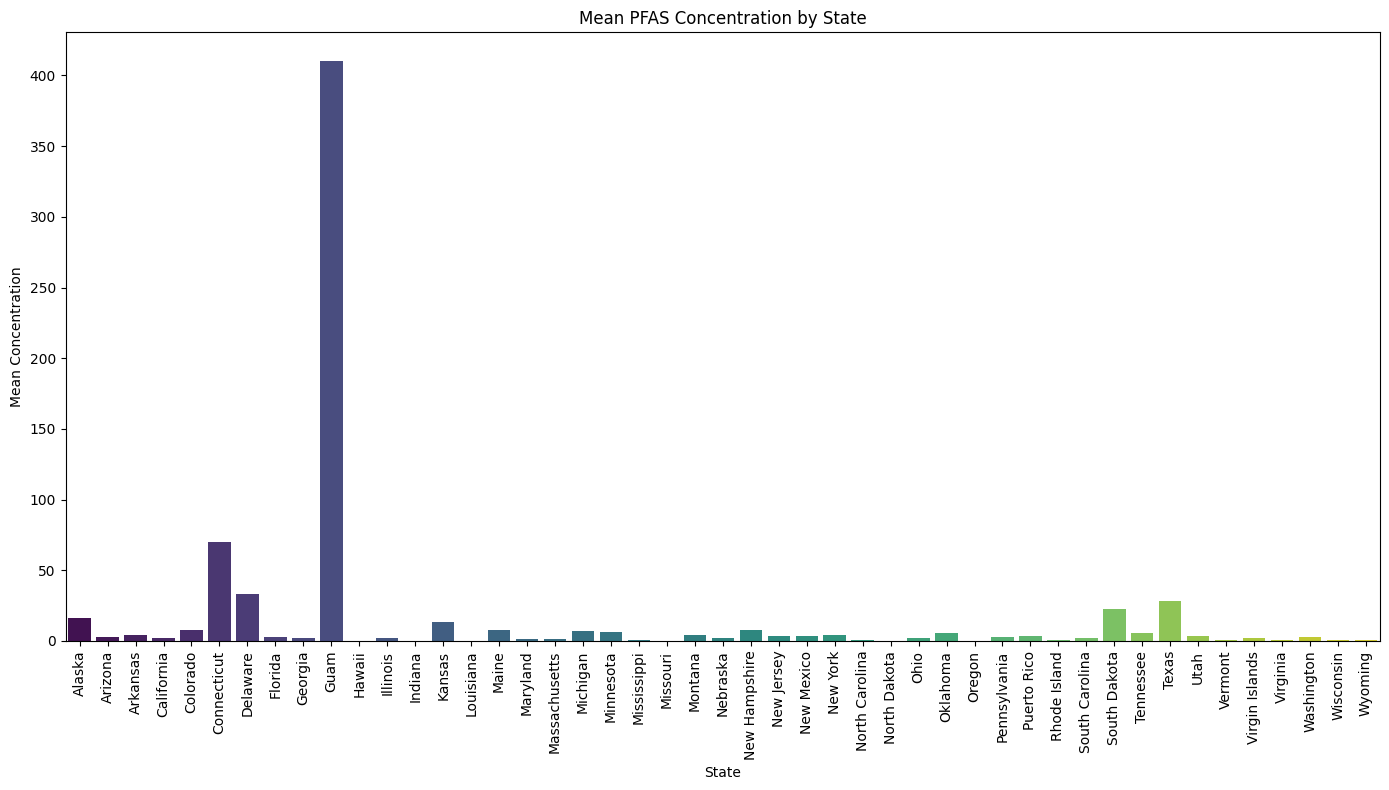

In [169]:
plt.figure(figsize=(14, 8))
sns.barplot(x='state', y='concentration', data=all_states_dw.groupby('state')['concentration'].mean().reset_index(), palette='viridis')

# Adding titles and labels
plt.title('Mean PFAS Concentration by State')
plt.xlabel('State')
plt.ylabel('Mean Concentration')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [184]:
def standardize_date(date):
    date = str(date)  # Ensure the date is a string
    # Check if the date is a four-digit year using regex
    if re.match(r'^\d{4}$', date):
        # Convert year-only entries to datetime, assuming January 1st
        return pd.to_datetime(date + '-01-01')
    else:
        # Otherwise, try normal datetime conversion
        try:
            return pd.to_datetime(date)
        except:
            return pd.NaT  # Return Not a Time (NaT) for invalid formats

In [203]:
filtered_df['sampling_date']

0        2022-09-28
1        2022-09-28
2        2022-09-28
3        2022-09-28
4        2022-09-28
            ...    
376669   2018-01-01
376670   2018-01-01
376671   2018-01-01
376672   2018-01-01
376673   2018-01-01
Name: sampling_date, Length: 376674, dtype: datetime64[ns]

In [224]:
all_states_df_withppl['sampling_date'] = all_states_df_withppl['sampling_date'].apply(standardize_date)

In [238]:
filtered_df = all_states_df_withppl[
    all_states_df_withppl['source_type'].isin(['DW', 'drinking water', 'Drinking Water']) &
    all_states_df_withppl['analyte'].isin(pfas_analytes)
]

In [239]:
pd.to_datetime(filtered_df['sampling_date'])

6      2022-09-28
12     2022-09-28
13     2022-09-28
16     2022-09-28
18     2022-09-28
          ...    
5896   2018-01-01
5958   2018-01-01
5959   2018-01-01
6027   2018-01-01
6028   2018-01-01
Name: sampling_date, Length: 382928, dtype: datetime64[ns]

In [240]:
filtered_df = filtered_df[filtered_df['sampling_date'].dt.year != 1970]

In [241]:
# Remove duplicates in the DataFrame if any
filtered_df = filtered_df.drop_duplicates()

# Reset the index to ensure it is unique
filtered_df = filtered_df.reset_index(drop=True)

In [242]:
filtered_df['sampling_date'].min()

Timestamp('2005-09-20 00:00:00')

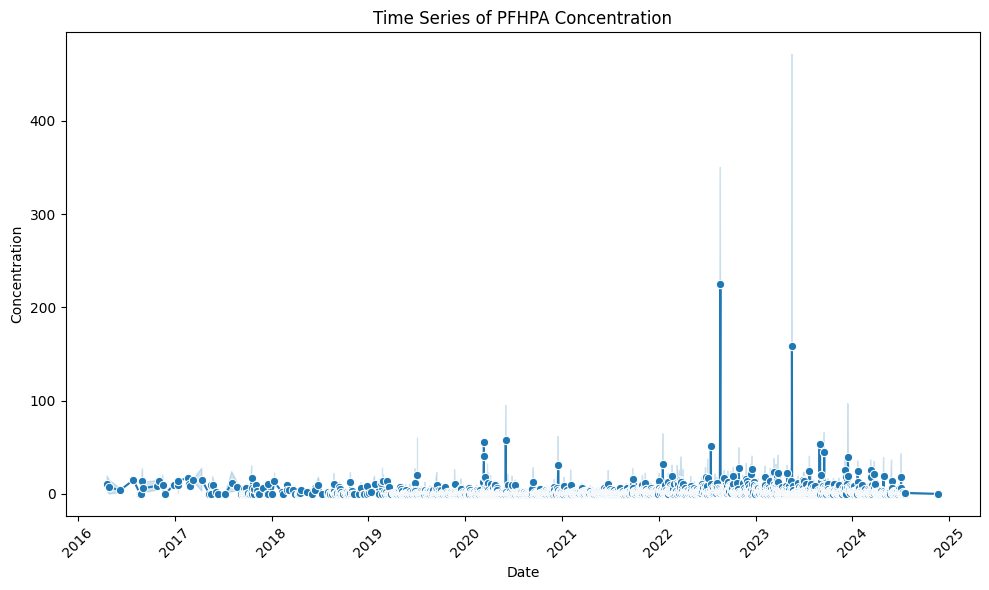

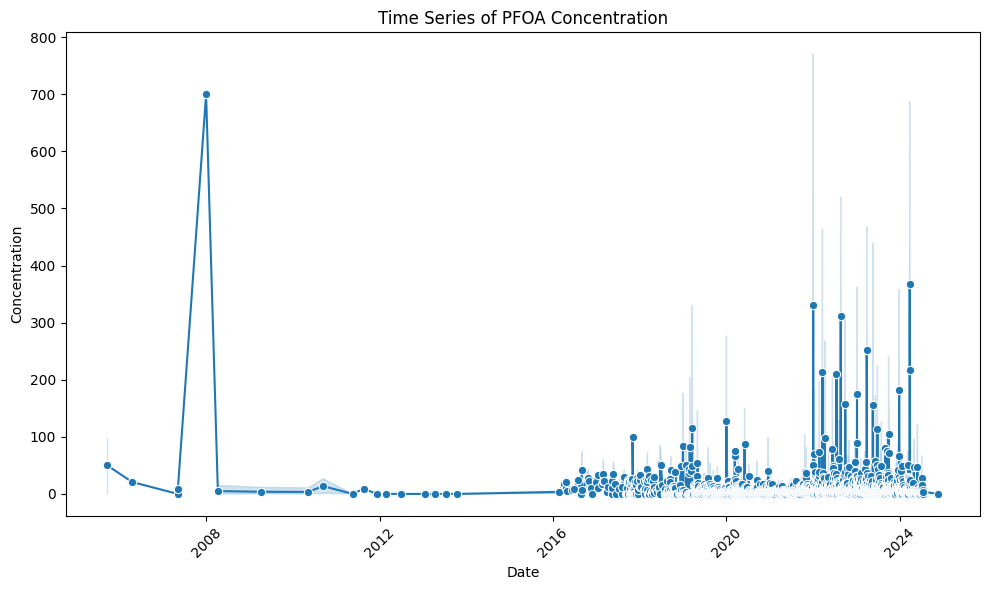

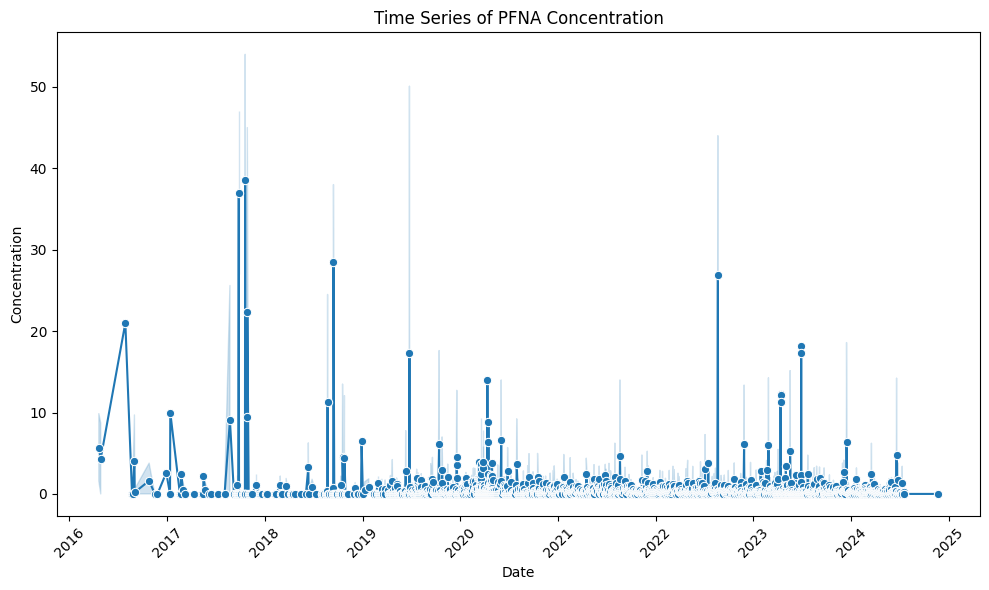

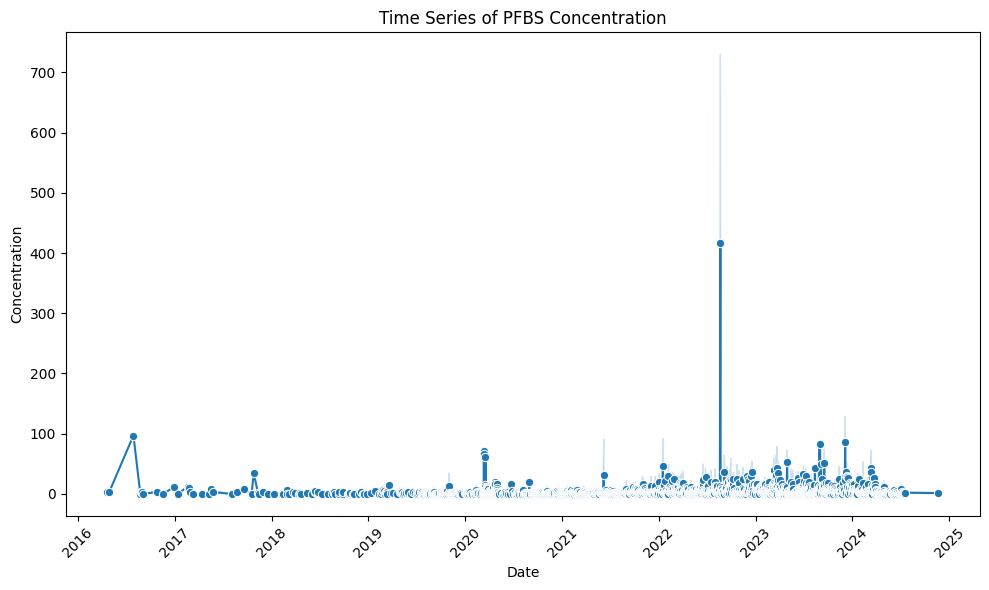

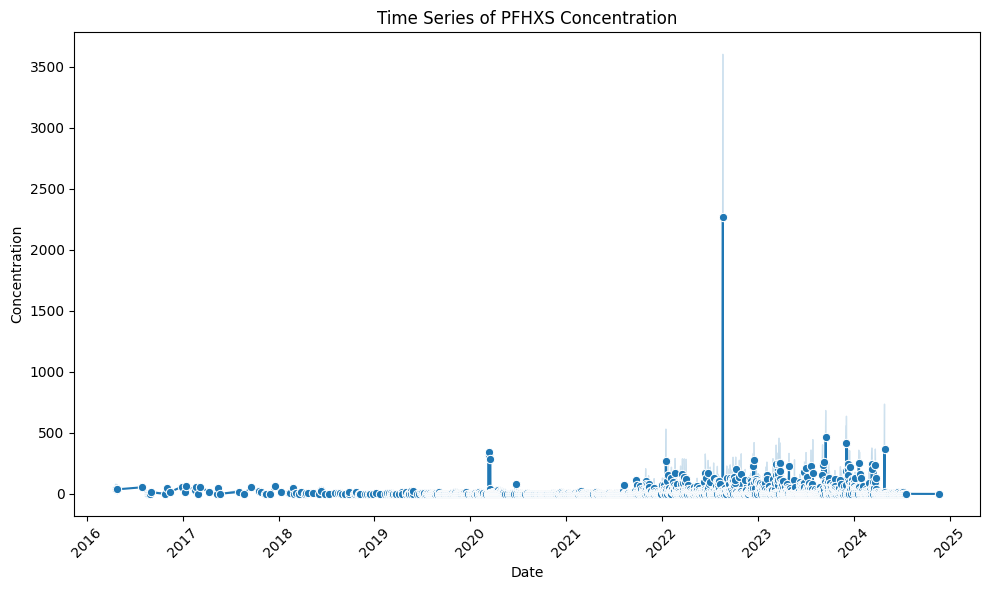

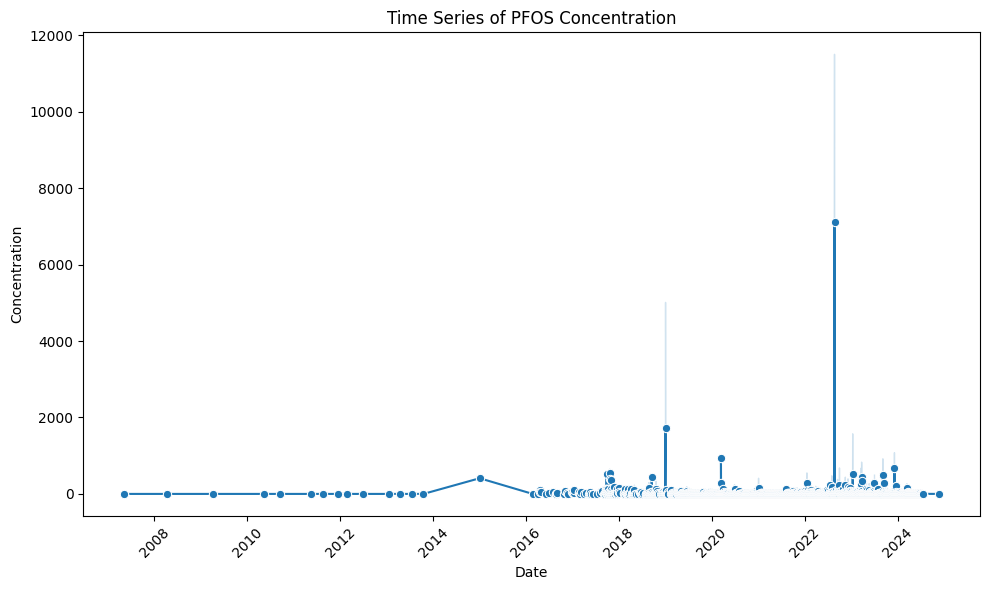

In [243]:
for analyte in pfas_analytes:
    plt.figure(figsize=(10, 6))
    
    # Filter data for the current analyte
    analyte_df = filtered_df[filtered_df['analyte'] == analyte]
    
    # Plotting the time series for the current analyte
    sns.lineplot(data=analyte_df, x='sampling_date', y='concentration', marker='o')
    
    # Adding titles and labels
    plt.title(f'Time Series of {analyte} Concentration')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [245]:
filtered_df = all_states_df_withppl[
    all_states_df_withppl['source_type'].isin(['DW', 'drinking water', 'Drinking Water']) &
    all_states_df_withppl['analyte'].isin(pfas_analytes)
]

# Group by state, state_code (if you add it later), and analyte, then calculate the average concentration
grouped_df = filtered_df.groupby(['data_source', 'analyte'])['concentration'].mean().reset_index()

# Pivot the table to get the analytes as columns
pivot_df = grouped_df.pivot(index='data_source', columns='analyte', values='concentration').reset_index()

pivot_df

analyte                                     data_source       PFBS      PFHPA  \
0                                                  ADEQ   0.000000   0.000000   
1                                                 CDPHE   1.427321   0.523268   
2                                                   DEP   1.115777   0.720631   
3                                                   DEQ   0.066372   0.014139   
4                                                  DHEC   0.369856   0.162388   
5                                                   DOH   1.193885   0.168405   
6                                                 DWGWP   0.362523   0.225890   
7                                                   DoD  16.909558  10.055841   
8                       GAMA-Division of Drinking Water        NaN   2.216196   
9        Indiana Department of Environmental Management   0.533137   0.079478   
10                                                  MDE   3.899693   1.746667   
11                                            Maine DWP   0.389247   1.155049   
12                                              MassGOV   2.105664   1.852570   
13                                                 NMED   0.896875   0.253125   
14                                                  OHA   0.141538   0.189744   
15            PFAS Testing of Ohio Public Water Systems   1.038095        NaN   
16                                                  PPL        NaN        NaN   
17                        VIRGINIA DEPARTMENT OF HEALTH   1.253834   0.698639   
18            WISconsin Department of Natural Resources   1.047748   0.445336   

analyte       PFHXS      PFNA       PFOA        PFOS  
0          3.010000  0.000000   1.110000    0.000000  
1          2.528766  0.129649   1.066171    3.006073  
2          1.378398  0.401942   2.029369    2.471359  
3          0.059737  0.000000   0.018540    0.025438  
4          0.967949  0.000000        NaN         NaN  
5          2.388215  0.163340   0.623220    2.761886  
6          0.652437  0.192645   1.027814    1.576794  
7        103.768650  0.598840  34.165880   70.641210  
8               NaN  0.486158   6.142011   13.331157  
9          0.197896  0.049854   0.367603    0.237662  
10         4.523991  0.306491   3.991886    7.105614  
11         0.147434  0.284300   2.063717    1.154466  
12         2.164963  0.329198   4.839305    4.212143  
13         1.395625  0.000000   0.000000    0.000000  
14         0.388718  0.000000   0.167949    1.085333  
15         0.822222  0.000000   3.222880    1.082869  
16              NaN       NaN  58.294118  312.673913  
17         0.935683  0.155958   2.471483    3.737653  
18         1.910904  0.109067   1.302477    1.686579

In [246]:
pivot_df = pivot_df.reset_index()  # Resetting the index if it was set incorrectly
pivot_df.columns.name = None

In [248]:
pivot_df = pivot_df.drop(columns=['index'])

In [249]:
pivot_df

data_source       PFBS      PFHPA  \
0                                             ADEQ   0.000000   0.000000   
1                                            CDPHE   1.427321   0.523268   
2                                              DEP   1.115777   0.720631   
3                                              DEQ   0.066372   0.014139   
4                                             DHEC   0.369856   0.162388   
5                                              DOH   1.193885   0.168405   
6                                            DWGWP   0.362523   0.225890   
7                                              DoD  16.909558  10.055841   
8                  GAMA-Division of Drinking Water        NaN   2.216196   
9   Indiana Department of Environmental Management   0.533137   0.079478   
10                                             MDE   3.899693   1.746667   
11                                       Maine DWP   0.389247   1.155049   
12                                         MassGOV   2.105664   1.852570   
13                                            NMED   0.896875   0.253125   
14                                             OHA   0.141538   0.189744   
15       PFAS Testing of Ohio Public Water Systems   1.038095        NaN   
16                                             PPL        NaN        NaN   
17                   VIRGINIA DEPARTMENT OF HEALTH   1.253834   0.698639   
18       WISconsin Department of Natural Resources   1.047748   0.445336   

         PFHXS      PFNA       PFOA        PFOS  
0     3.010000  0.000000   1.110000    0.000000  
1     2.528766  0.129649   1.066171    3.006073  
2     1.378398  0.401942   2.029369    2.471359  
3     0.059737  0.000000   0.018540    0.025438  
4     0.967949  0.000000        NaN         NaN  
5     2.388215  0.163340   0.623220    2.761886  
6     0.652437  0.192645   1.027814    1.576794  
7   103.768650  0.598840  34.165880   70.641210  
8          NaN  0.486158   6.142011   13.331157  
9     0.197896  0.049854   0.367603    0.237662  
10    4.523991  0.306491   3.991886    7.105614  
11    0.147434  0.284300   2.063717    1.154466  
12    2.164963  0.329198   4.839305    4.212143  
13    1.395625  0.000000   0.000000    0.000000  
14    0.388718  0.000000   0.167949    1.085333  
15    0.822222  0.000000   3.222880    1.082869  
16         NaN       NaN  58.294118  312.673913  
17    0.935683  0.155958   2.471483    3.737653  
18    1.910904  0.109067   1.302477    1.686579

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_20790/1310076886.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




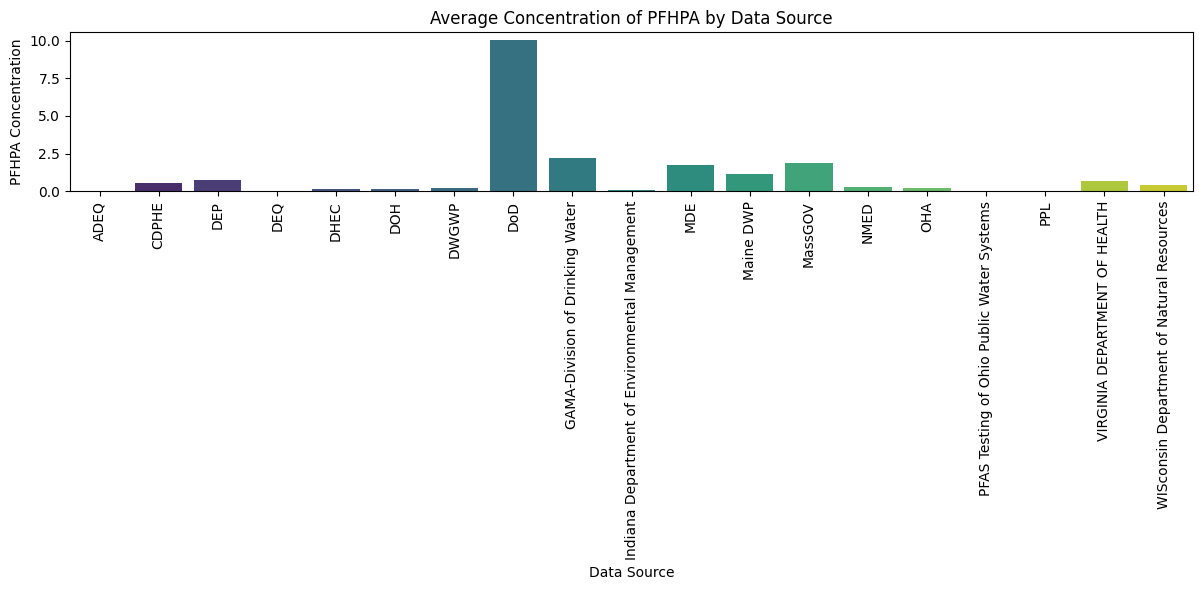

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_20790/1310076886.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




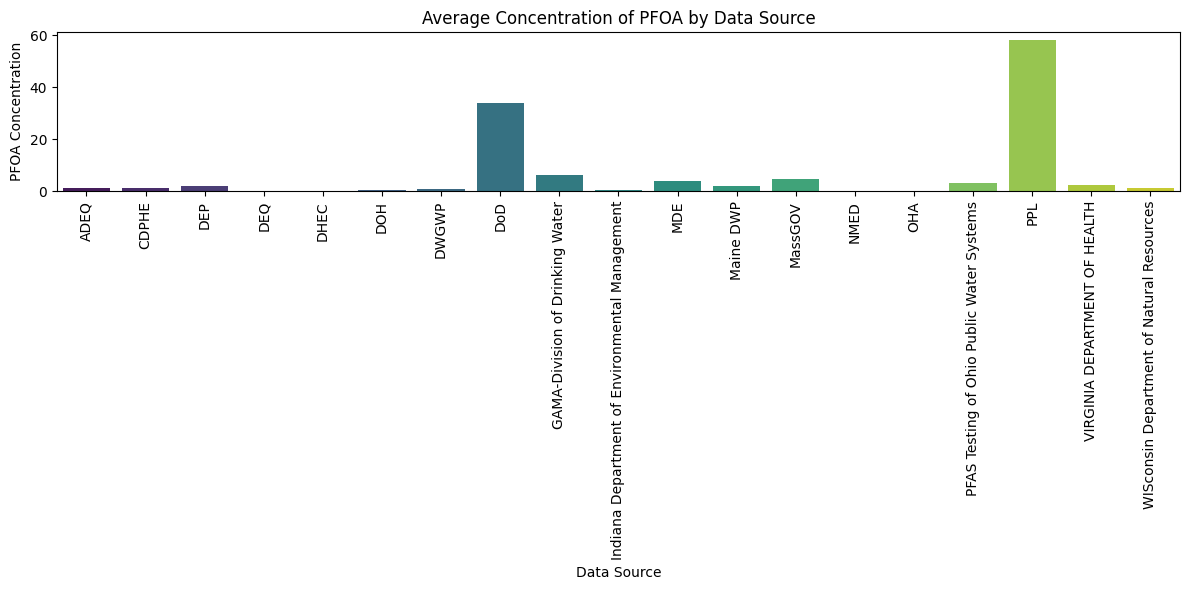

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_20790/1310076886.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




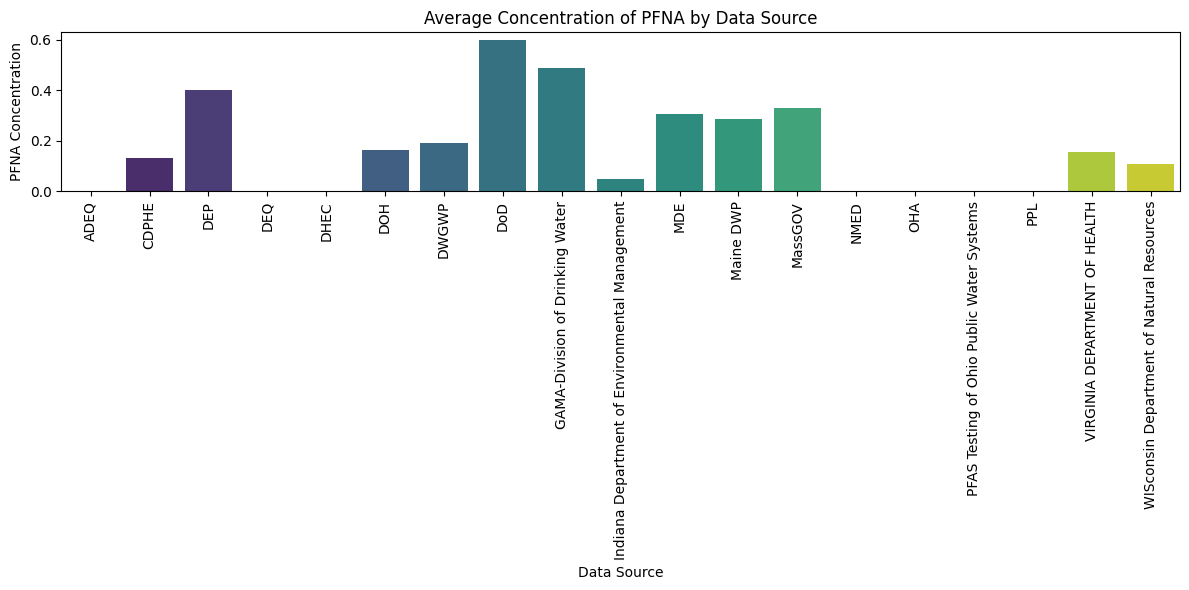

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_20790/1310076886.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




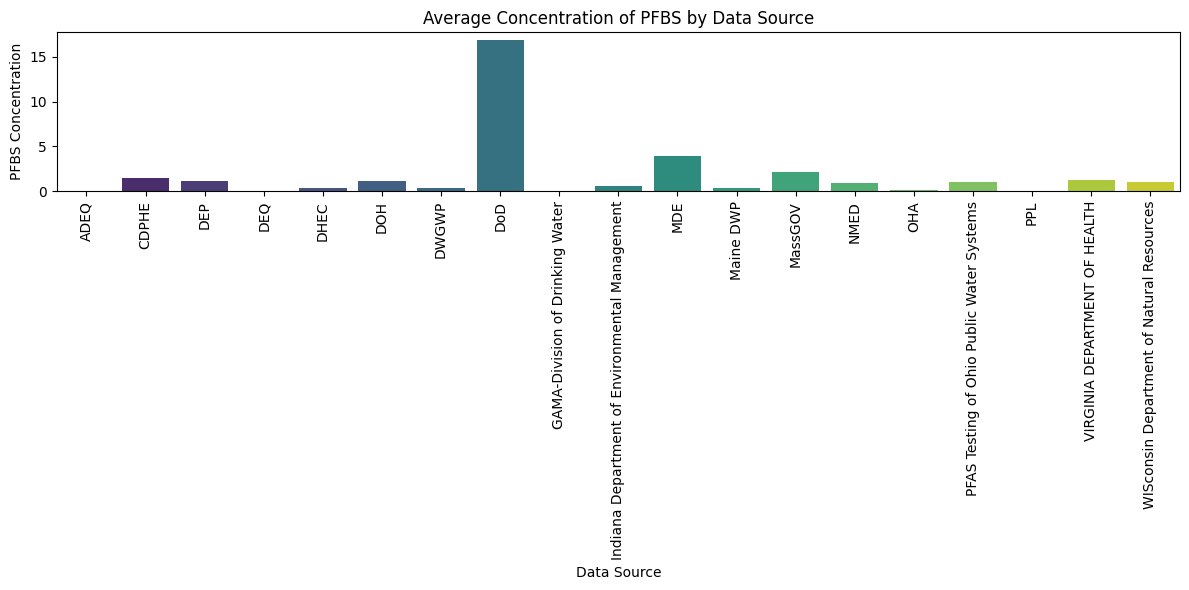

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_20790/1310076886.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




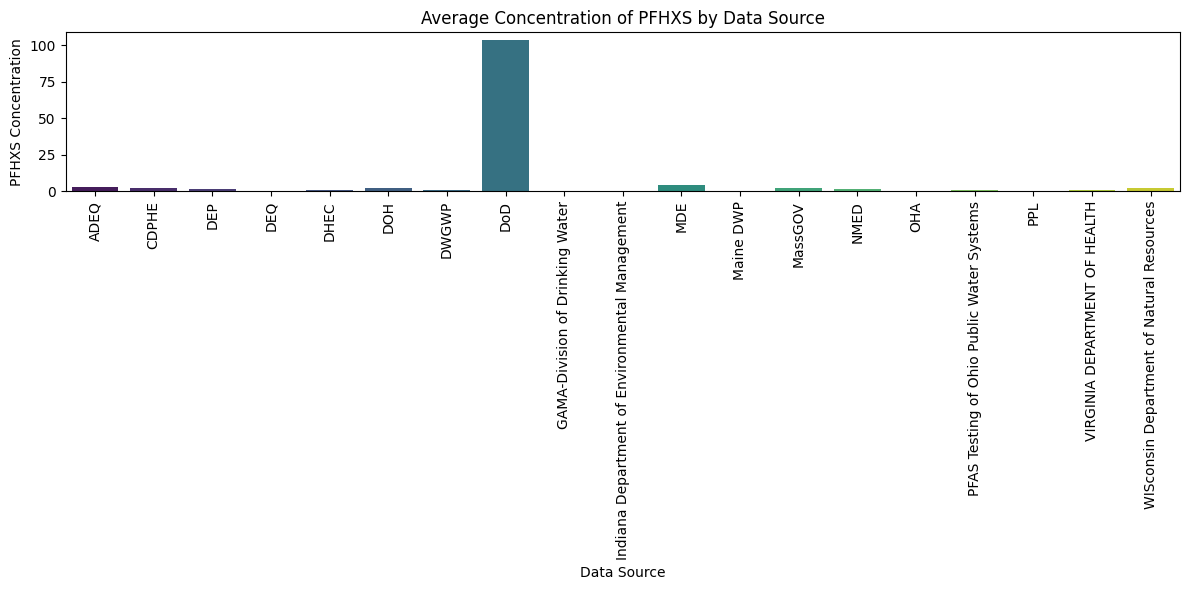

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_20790/1310076886.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




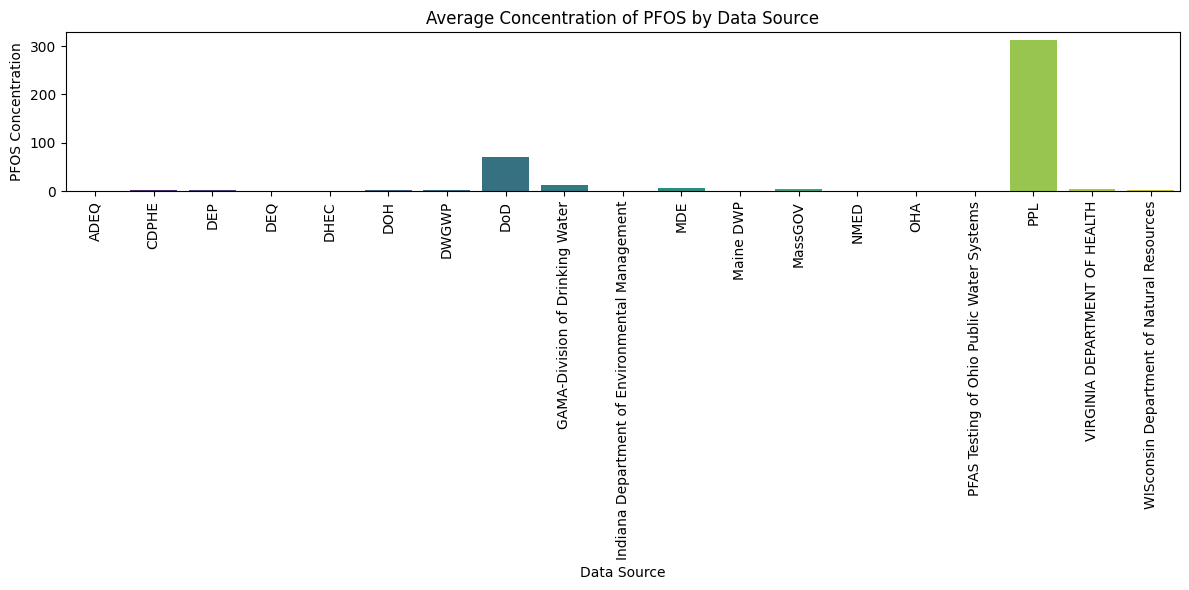

In [251]:
for analyte in pfas_analytes:
    plt.figure(figsize=(12, 6))
    
    # Plotting the bar plot for each PFAS analyte
    sns.barplot(data=pivot_df, x='data_source', y=analyte, palette='viridis')
    
    # Adding titles and labels
    plt.title(f'Average Concentration of {analyte} by Data Source')
    plt.xlabel('Data Source')
    plt.ylabel(f'{analyte} Concentration')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    
    # Show the plot
    plt.show()

## California PFAS analtsis:

In [148]:
ca_df['analyte'].unique()

array(['PFTRIDA', 'PFNA', 'PFHA', 'PFHPA', 'PFHXSA', 'HFPA-DA', 'PFOS',
       'PFNDCA', 'PFBSA', '9ClPF3ONS', 'PFOA', 'PFUNDCA', 'NMEFOSAA',
       'PFDOA', 'PFTEDA', 'NETFOSAA', '11ClPF3OUDS', 'PFBTA', 'PFPA',
       'PFEESA', 'NFDHA', 'PFMPA', '4:2FTS', '8:2FTS', 'PFMBA', 'PFPES',
       '6:2FTS', 'PFHPSA', 'PFBS', 'PFDA', 'PFHXS', 'PFHXA', 'PFTRDA',
       'PFUNA', 'PFBA', 'PFDS', 'PFHPS', 'PFNS', 'PFOSA', 'PFPEA',
       'HFPO-DA', '11CL-PF3OUDS', 'ADONA', '9CL-PF3ONS', 'NETFOSA',
       'NETFOSE', 'NMEFOSA', 'NMEFOSE', 'PFDOS', 'PFHXDA', 'PFODA',
       '10:2FTS', '3:3FTCA', '5:3FTCA', '7:3FTCA'], dtype=object)

In [153]:
ca_pfas_avg_df = ca_df[ca_df['analyte'].isin(list(ca_df['analyte'].unique()))].groupby('analyte')['concentration'].mean().reset_index()

In [155]:
ca_df_sorted = ca_pfas_avg_df.sort_values(by='concentration', ascending=False)

In [156]:
ca_df_sorted

analyte  concentration
36         PFHXS      64.349249
34         PFHXA      32.935338
48         PFPEA      27.058381
45          PFOS      13.706615
21          PFBA      13.648091
22          PFBS      10.037175
37        PFHXSA       6.999359
43          PFOA       6.375863
30          PFHA       5.592004
47          PFPA       4.172867
23         PFBSA       3.442028
24         PFBTA       3.146561
46         PFOSA       3.105446
31         PFHPA       2.373311
32         PFHPS       2.094658
49         PFPES       0.988960
6         6:2FTS       0.659121
40          PFNA       0.489864
44         PFODA       0.246333
41        PFNDCA       0.151889
25          PFDA       0.059350
8         8:2FTS       0.055969
33        PFHPSA       0.055815
53         PFUNA       0.014346
4         4:2FTS       0.008760
54       PFUNDCA       0.008015
51        PFTRDA       0.007313
15      NETFOSAA       0.002961
19      NMEFOSAA       0.001041
50        PFTEDA       0.000027
39         PFMPA       0.000000
38         PFMBA       0.000000
35        PFHXDA       0.000000
52       PFTRIDA       0.000000
42          PFNS       0.000000
0        10:2FTS       0.000000
29        PFEESA       0.000000
12       HFPA-DA       0.000000
2    11ClPF3OUDS       0.000000
3        3:3FTCA       0.000000
5        5:3FTCA       0.000000
7        7:3FTCA       0.000000
9     9CL-PF3ONS       0.000000
10     9ClPF3ONS       0.000000
11         ADONA       0.000000
13       HFPO-DA       0.000000
28          PFDS       0.000000
14       NETFOSA       0.000000
16       NETFOSE       0.000000
17         NFDHA       0.000000
18       NMEFOSA       0.000000
20       NMEFOSE       0.000000
26         PFDOA       0.000000
1   11CL-PF3OUDS       0.000000
27         PFDOS       0.000000

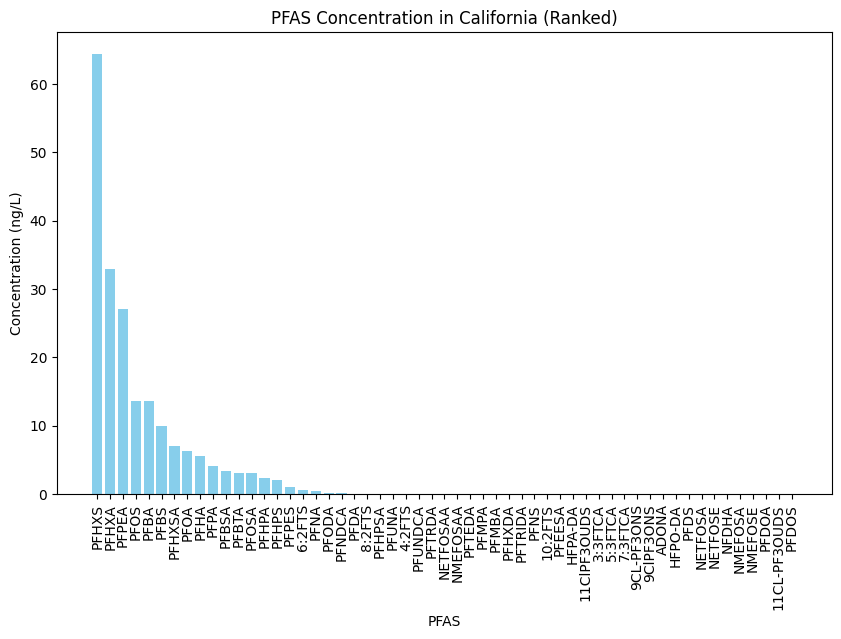

In [159]:
plt.figure(figsize=(10, 6))
plt.bar(ca_df_sorted['analyte'], ca_df_sorted['concentration'], color='skyblue')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.xlabel('PFAS')
plt.ylabel('Concentration (ng/L)')
plt.title('PFAS Concentration in California (Ranked)')
plt.show()

## UCMR3 & UCMR5

In [3]:
os.getcwd()

'/Users/chuqiwang/Desktop/US_PFAS_Project/data_analysis'

In [4]:
ucmr3_df = pd.read_csv('UCMR3&5/UCMR3/ucmr3_cleaned.csv', index_col=0)

In [5]:
ucmr5_df = pd.read_csv('UCMR3&5/UCMR5/ucmr5_cleaned.csv', index_col=0)

In [8]:
ucmr3_df

sample_id      sampling_location data_source  latitude  \
0              3209653              WTP EPTDS       UCMR3       NaN   
1              3209653              WTP EPTDS       UCMR3       NaN   
2              3209653              WTP EPTDS       UCMR3       NaN   
3              3209653              WTP EPTDS       UCMR3       NaN   
4              3209653              WTP EPTDS       UCMR3       NaN   
...                ...                    ...         ...       ...   
221826  201511140097AM  EPTDS from GUDI Plant       UCMR3       NaN   
221827  201511140097AM  EPTDS from GUDI Plant       UCMR3       NaN   
221828  201511140097AM  EPTDS from GUDI Plant       UCMR3       NaN   
221829  201511140097AM  EPTDS from GUDI Plant       UCMR3       NaN   
221830  201511140097AM  EPTDS from GUDI Plant       UCMR3       NaN   

        longitude sampling_date     pws_id                 water_system_name  \
0             NaN    2015-03-17  010106001  Mashantucket Pequot Water System   
1             NaN    2015-03-17  010106001  Mashantucket Pequot Water System   
2             NaN    2015-03-17  010106001  Mashantucket Pequot Water System   
3             NaN    2015-03-17  010106001  Mashantucket Pequot Water System   
4             NaN    2015-03-17  010106001  Mashantucket Pequot Water System   
...           ...           ...        ...                               ...   
221826        NaN    2015-12-16  WY5601415  Casper Board of Public Utilities   
221827        NaN    2015-12-16  WY5601415  Casper Board of Public Utilities   
221828        NaN    2015-12-16  WY5601415  Casper Board of Public Utilities   
221829        NaN    2015-12-16  WY5601415  Casper Board of Public Utilities   
221830        NaN    2015-12-16  WY5601415  Casper Board of Public Utilities   

        population  well_type  ...  city county   MRL  DL  analytical_methods  \
0              NaN        NaN  ...   NaN    NaN  20.0 NaN             EPA 537   
1              NaN        NaN  ...   NaN    NaN  90.0 NaN             EPA 537   
2              NaN        NaN  ...   NaN    NaN  10.0 NaN             EPA 537   
3              NaN        NaN  ...   NaN    NaN  30.0 NaN             EPA 537   
4              NaN        NaN  ...   NaN    NaN  20.0 NaN             EPA 537   
...            ...        ...  ...   ...    ...   ...  ..                 ...   
221826         NaN        NaN  ...   NaN    NaN  90.0 NaN             EPA 537   
221827         NaN        NaN  ...   NaN    NaN  10.0 NaN             EPA 537   
221828         NaN        NaN  ...   NaN    NaN  30.0 NaN             EPA 537   
221829         NaN        NaN  ...   NaN    NaN  20.0 NaN             EPA 537   
221830         NaN        NaN  ...   NaN    NaN  40.0 NaN             EPA 537   

        is_detected  analyte  concentration pfas_total  note  
0             False     PFOA            0.0        NaN   NaN  
1             False     PFBS            0.0        NaN   NaN  
2             False    PFHPA            0.0        NaN   NaN  
3             False    PFHXS            0.0        NaN   NaN  
4             False     PFNA            0.0        NaN   NaN  
...             ...      ...            ...        ...   ...  
221826        False     PFBS            0.0        NaN   NaN  
221827        False    PFHPA            0.0        NaN   NaN  
221828        False    PFHXS            0.0        NaN   NaN  
221829        False     PFNA            0.0        NaN   NaN  
221830        False     PFOS            0.0        NaN   NaN  

[221831 rows x 24 columns]

In [9]:
ucmr5_df

sample_id                             sampling_location data_source  \
0       810-79458-1                   Entry point to Dist. System       UCMR5   
1       810-79458-1                   Entry point to Dist. System       UCMR5   
2       810-79458-1                   Entry point to Dist. System       UCMR5   
3       810-73346-1                   Entry point to Dist. System       UCMR5   
4       810-79458-1                   Entry point to Dist. System       UCMR5   
...             ...                                           ...         ...   
915936      117104R  Facility 930 - Booker Road and Cheyenne Road       UCMR5   
915937      117104R  Facility 930 - Booker Road and Cheyenne Road       UCMR5   
915938      117104R  Facility 930 - Booker Road and Cheyenne Road       UCMR5   
915939      117104R  Facility 930 - Booker Road and Cheyenne Road       UCMR5   
915940      117104R  Facility 930 - Booker Road and Cheyenne Road       UCMR5   

        latitude  longitude sampling_date     pws_id  \
0            NaN        NaN    2023-09-27  010106001   
1            NaN        NaN    2023-09-27  010106001   
2            NaN        NaN    2023-09-27  010106001   
3            NaN        NaN    2023-08-09  010106001   
4            NaN        NaN    2023-09-27  010106001   
...          ...        ...           ...        ...   
915936       NaN        NaN    2024-04-22  WY5680122   
915937       NaN        NaN    2024-04-22  WY5680122   
915938       NaN        NaN    2024-04-22  WY5680122   
915939       NaN        NaN    2024-04-22  WY5680122   
915940       NaN        NaN    2024-04-22  WY5680122   

                       water_system_name  population  well_type  ...  city  \
0       Mashantucket Pequot Water System         NaN        NaN  ...   NaN   
1       Mashantucket Pequot Water System         NaN        NaN  ...   NaN   
2       Mashantucket Pequot Water System         NaN        NaN  ...   NaN   
3       Mashantucket Pequot Water System         NaN        NaN  ...   NaN   
4       Mashantucket Pequot Water System         NaN        NaN  ...   NaN   
...                                  ...         ...        ...  ...   ...   
915936              USAF F.E. WARREN AFB         NaN        NaN  ...   NaN   
915937              USAF F.E. WARREN AFB         NaN        NaN  ...   NaN   
915938              USAF F.E. WARREN AFB         NaN        NaN  ...   NaN   
915939              USAF F.E. WARREN AFB         NaN        NaN  ...   NaN   
915940              USAF F.E. WARREN AFB         NaN        NaN  ...   NaN   

       county  MRL  DL  analytical_methods  is_detected   analyte  \
0         NaN  4.0 NaN             EPA 533        False     PFPES   
1         NaN  3.0 NaN             EPA 533         True      PFBS   
2         NaN  3.0 NaN             EPA 533        False     ADONA   
3         NaN  6.0 NaN           EPA 537.1        False  NMEFOSAA   
4         NaN  3.0 NaN             EPA 533         True     PFPEA   
...       ...  ...  ..                 ...          ...       ...   
915936    NaN  4.0 NaN             EPA 533        False      PFOA   
915937    NaN  4.0 NaN             EPA 533        False     PFMPA   
915938    NaN  2.0 NaN             EPA 533        False     PFUNA   
915939    NaN  3.0 NaN             EPA 533        False     PFHXS   
915940    NaN  4.0 NaN             EPA 533        False      PFOS   

        concentration pfas_total  note  
0                 0.0        NaN   NaN  
1                 3.6        NaN   NaN  
2                 0.0        NaN   NaN  
3                 0.0        NaN   NaN  
4                18.2        NaN   NaN  
...               ...        ...   ...  
915936            0.0        NaN   NaN  
915937            0.0        NaN   NaN  
915938            0.0        NaN   NaN  
915939            0.0        NaN   NaN  
915940            0.0        NaN   NaN  

[915941 rows x 24 columns]

In [10]:
ucmr3_df['state'].unique()

array(['01', '05', '06', '08', '09', '10', 'AK', 'AL', 'AR', 'AS', 'AZ',
       'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NN', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [11]:
ucmr5_df['state'].unique()

array(['01', '02', '04', '05', '06', '08', '09', '10', 'AK', 'AL', 'AR',
       'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NN', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype=object)

In [12]:
ucmr_df = pd.concat([ucmr3_df, ucmr5_df])

In [13]:
ucmr_df.index = range(0, len(ucmr_df))

In [14]:
ucmr_df['state'].unique()

array(['01', '05', '06', '08', '09', '10', 'AK', 'AL', 'AR', 'AS', 'AZ',
       'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NN', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY', '02', '04'],
      dtype=object)

In [15]:
ucmr_df['source_type'].unique()

array(['GU', 'SW', 'GW', 'MX'], dtype=object)

In [16]:
def is_numeric_state(value):
    return value.isdigit()

numeric_states_ucmr = ucmr_df[ucmr_df['state'].apply(is_numeric_state)]
abbreviation_states_ucmr = ucmr_df[~ucmr_df['state'].apply(is_numeric_state)]

In [17]:
numeric_states_ucmr['state'].unique()

array(['01', '05', '06', '08', '09', '10', '02', '04'], dtype=object)

EPA Region (states): Region 1 (CT, ME, MA, NH, RI, VT), Region 2 (NJ, NY, PR [Puerto Rico], VI [Virgin Islands]), Region 3 (DE, DC, MD, PA, VA, WV), Region 4 (AL, FL, GA, KY, MS, NC, SC, TN), Region 5 (IL, IN, MI, MN, OH, WI), Region 6 (AR, LA, NM, OK, TX), Region 7 (IA, KS, MO, NE), Region 8 (CO, MT, ND, SD, UT, WY), Region 9 (AZ, CA, HI, NV, AS [American Samoa], GU [Guam], MP [Northern Marianas Islands], NN [Navajo Nation]), Region 10 (AK, ID, OR, WA)

In [18]:
abbreviation_states_ucmr['state'].unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NN', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI',
       'WV', 'WY'], dtype=object)

In [19]:
numeric_states_ucmr.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

state  concentration
0    01       0.773575
6    09       0.145813
4    06       0.008726
1    02       0.000000
2    04       0.000000
3    05       0.000000
5    08       0.000000
7    10       0.000000

EPA Region (states): Region 1 (CT, ME, MA, NH, RI, VT), Region 2 (NJ, NY, PR [Puerto Rico], VI [Virgin Islands]), Region 3 (DE, DC, MD, PA, VA, WV), Region 4 (AL, FL, GA, KY, MS, NC, SC, TN), Region 5 (IL, IN, MI, MN, OH, WI), Region 6 (AR, LA, NM, OK, TX), Region 7 (IA, KS, MO, NE), Region 8 (CO, MT, ND, SD, UT, WY), Region 9 (AZ, CA, HI, NV, AS [American Samoa], GU [Guam], MP [Northern Marianas Islands], NN [Navajo Nation]), Region 10 (AK, ID, OR, WA)

In [20]:
abbreviation_states_ucmr.groupby('state')['concentration'].mean().reset_index().sort_values(by='concentration', ascending=False) # mean concentration

state  concentration
27    MP      17.408442
9     DE       1.998568
6     CO       1.463674
12    GU       1.094689
25    MN       0.798467
42    PA       0.473127
10    FL       0.445481
34    NJ       0.415666
55    WV       0.359475
23    ME       0.349457
4     AZ       0.349101
1     AL       0.316798
11    GA       0.291040
30    NC       0.282358
48    TX       0.276932
14    IA       0.247483
21    MA       0.233741
22    MD       0.231363
44    RI       0.218660
45    SC       0.214043
39    OH       0.195767
38    NY       0.186545
33    NH       0.148026
7     CT       0.143295
18    KS       0.141181
53    WA       0.122065
5     CA       0.117827
47    TN       0.116541
43    PR       0.105988
54    WI       0.100085
16    IL       0.093713
50    VA       0.084917
8     DC       0.084469
40    OK       0.072136
19    KY       0.064306
17    IN       0.064266
46    SD       0.054630
35    NM       0.054322
56    WY       0.043415
49    UT       0.033185
15    ID       0.032882
37    NV       0.029062
26    MO       0.028167
20    LA       0.024975
31    ND       0.021641
0     AK       0.019108
24    MI       0.017875
3     AS       0.017870
41    OR       0.016277
32    NE       0.012117
29    MT       0.010022
2     AR       0.006841
52    VT       0.004228
36    NN       0.004019
28    MS       0.001009
13    HI       0.000623
51    VI       0.000000

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51217/1901758059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='concentration', data=numeric_states_ucmr.groupby('state')['concentration'].mean().reset_index(), palette='viridis')


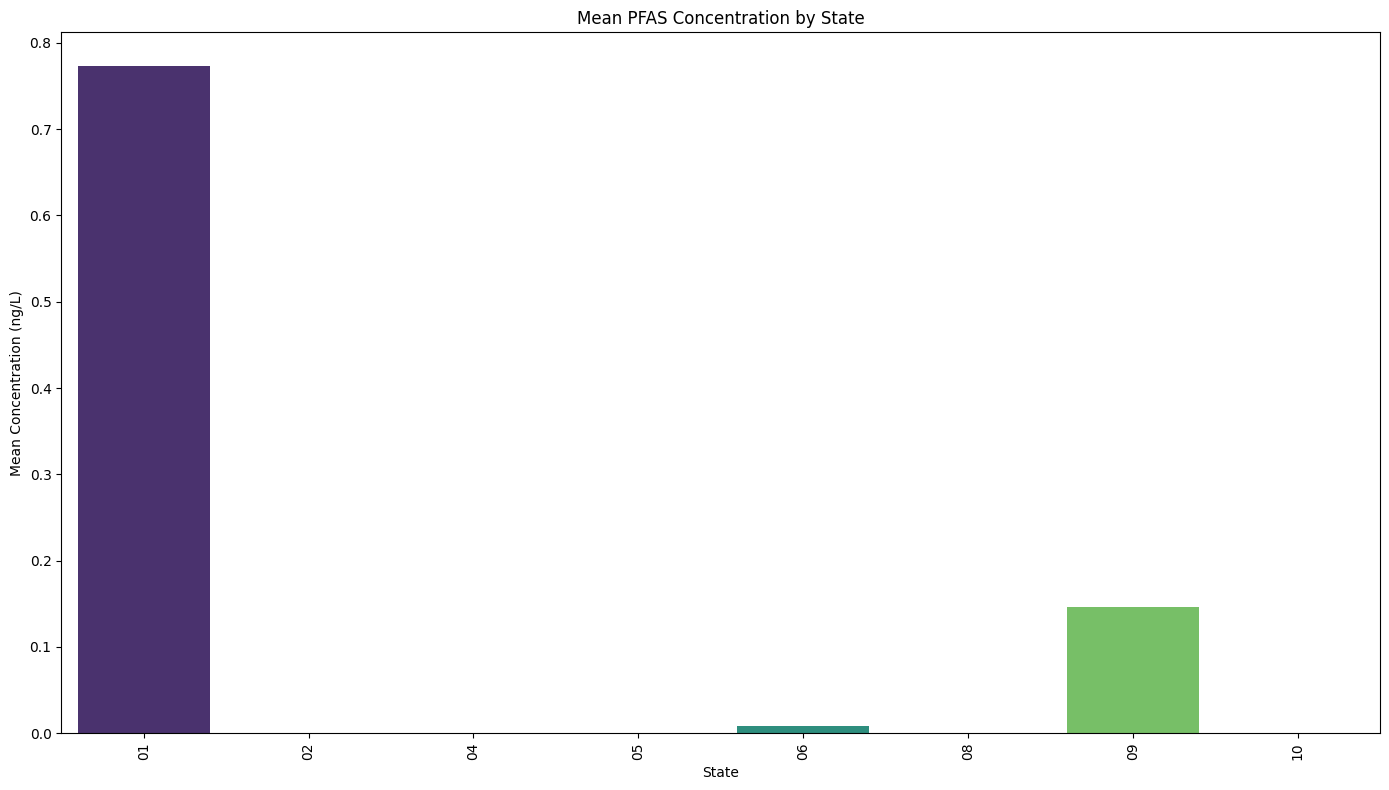

In [21]:
plt.figure(figsize=(14, 8))
sns.barplot(x='state', y='concentration', data=numeric_states_ucmr.groupby('state')['concentration'].mean().reset_index(), palette='viridis')

# Adding titles and labels
plt.title('Mean PFAS Concentration by State')
plt.xlabel('State')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/m8/kh2nk5652k94h_n7lqjvr8n00000gn/T/ipykernel_51217/3543230649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='concentration', data=abbreviation_states_ucmr.groupby('state')['concentration'].mean().reset_index(), palette='viridis')


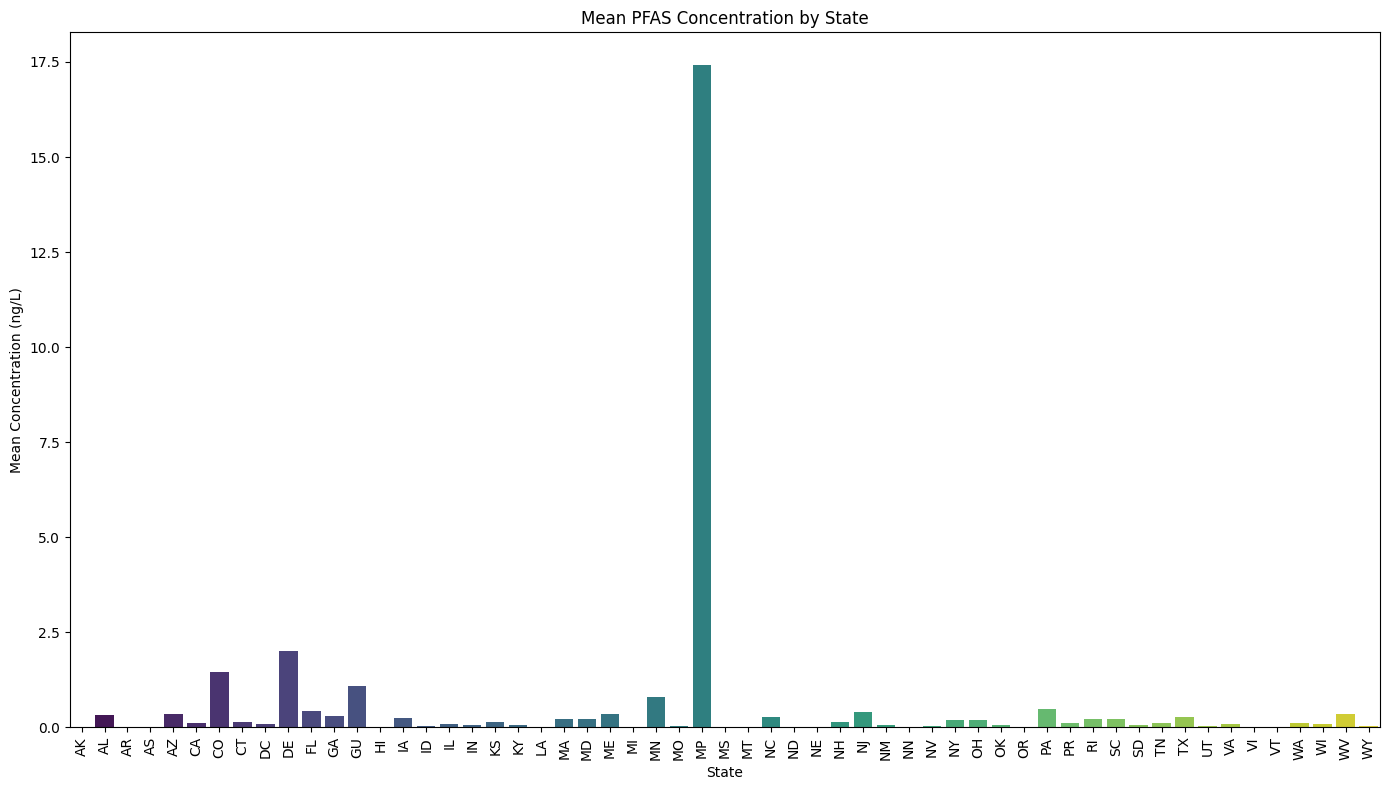

In [22]:
plt.figure(figsize=(14, 8))
sns.barplot(x='state', y='concentration', data=abbreviation_states_ucmr.groupby('state')['concentration'].mean().reset_index(), palette='viridis')

# Adding titles and labels
plt.title('Mean PFAS Concentration by State')
plt.xlabel('State')
plt.ylabel('Mean Concentration (ng/L)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
pfas_analytes = ['PFHPA', 'PFOA', 'PFNA', 'PFBS', 'PFHXS', 'PFOS']

filtered_num_df = numeric_states_ucmr[numeric_states_ucmr['analyte'].isin(pfas_analytes)]

grouped_num = filtered_num_df.groupby(['state', 'analyte'])['concentration'].mean().reset_index()

pivot_num = grouped_num.pivot(index='state', columns='analyte', values='concentration').reset_index()

pivot_num

analyte state      PFBS     PFHPA     PFHXS  PFNA      PFOA      PFOS
0          01  0.815385  0.800000  0.000000   0.0  1.623077  0.000000
1          02  0.000000  0.000000  0.000000   0.0  0.000000  0.000000
2          04  0.000000  0.000000  0.000000   0.0  0.000000  0.000000
3          05  0.000000  0.000000  0.000000   0.0  0.000000  0.000000
4          06  0.000000  0.000000  0.097059   0.0  0.000000  0.120588
5          08  0.000000  0.000000  0.000000   0.0  0.000000  0.000000
6          09  0.390476  0.087302  0.365079   0.0  0.130952  1.023016
7          10  0.000000  0.000000  0.000000   0.0  0.000000  0.000000

In [24]:
filtered_abbr_df = abbreviation_states_ucmr[abbreviation_states_ucmr['analyte'].isin(pfas_analytes)]

grouped_abbr = filtered_abbr_df.groupby(['state', 'analyte'])['concentration'].mean().reset_index()

pivot_abbr = grouped_abbr.pivot(index='state', columns='analyte', values='concentration').reset_index()

pivot_abbr

analyte state      PFBS      PFHPA      PFHXS      PFNA      PFOA        PFOS
0          AK  0.000000   0.000000   0.264557  0.000000  0.057595    0.000000
1          AL  1.349924   0.320041   0.043039  0.000000  0.914788    1.285314
2          AR  0.040395   0.000000   0.000000  0.000000  0.000000    0.000000
3          AS  0.044056   0.000000   0.000000  0.000000  0.000000    0.279720
4          AZ  0.989167   0.152580   1.623352  0.002044  0.619826    1.238957
5          CA  0.094522   0.060183   0.285546  0.006209  0.291709    0.632133
6          CO  0.686819   1.218911  10.880898  0.000000  2.380898    7.063801
7          CT  0.268966   0.038558   0.160815  0.000000  0.633281    0.605338
8          DC  0.000000   0.000000   0.000000  0.000000  0.000000    0.000000
9          DE  0.457692   2.561111   5.470513  0.510256  4.559402   13.271368
10         FL  0.639379   0.292207   0.837455  0.037083  0.577137    2.321312
11         GA  2.359704   0.156456   0.146595  0.000000  0.612446    0.749299
12         GU  0.893082   0.468239   4.051258  0.000000  0.258176    5.822642
13         HI  0.000000   0.000000   0.004983  0.000000  0.000000    0.000000
14         IA  0.249810   0.021293   0.243726  0.000000  0.070532    0.024525
15         ID  0.035387   0.000000   0.118009  0.149447  0.018325    0.087836
16         IL  0.196323   0.024467   0.076019  0.000000  0.100536    0.110350
17         IN  0.133629   0.012542   0.148280  0.000000  0.125971    0.123751
18         KS  0.204835   0.058462   0.615165  0.013626  0.073407    0.104176
19         KY  0.066132   0.029983   0.034206  0.000000  0.111750    0.123927
20         LA  0.009268   0.010407   0.002764  0.000000  0.014959    0.019024
21         MA  0.176599   0.180187   0.536921  0.018201  0.538690    1.101040
22         MD  0.808658   0.192208   0.149351  0.023593  0.612186    0.375325
23         ME  0.060390   0.111039   1.327273  0.000000  0.129870    3.831169
24         MI  0.045920   0.002905   0.027040  0.000000  0.012318    0.121730
25         MN  0.117667   0.184111   0.791333  0.000000  1.490000    1.542667
26         MO  0.010886   0.004432   0.062042  0.000000  0.004432    0.028902
27         MP  6.072857  11.270000  39.325714  0.000000  6.000000  179.258571
28         MS  0.003774   0.000000   0.000000  0.000000  0.000000    0.000000
29         MT  0.012863   0.000000   0.035685  0.000000  0.000000    0.027386
30         NC  0.428454   0.459671   0.452446  0.000000  0.564044    0.973660
31         ND  0.000000   0.000000   0.000000  0.000000  0.000000    0.000000
32         NE  0.017778   0.000000   0.094222  0.000000  0.000000    0.084889
33         NH  0.170438   0.120438   0.114964  0.000000  1.241026    0.529562
34         NJ  0.289314   0.208337   0.438561  0.167035  2.542184    0.853935
35         NM  0.094764   0.056370   0.070855  0.000000  0.022164    0.007330
36         NN  0.000000   0.000000   0.000000  0.000000  0.000000    0.000000
37         NV  0.045614   0.008553   0.172149  0.000000  0.033114    0.069298
38         NY  0.056805   0.198835   0.428419  0.047953  0.353977    0.925724
39         OH  0.172600   0.021077   0.708977  0.000000  0.171538    1.307572
40         OK  0.063645   0.009351   0.249046  0.000000  0.070611    0.256256
41         OR  0.052290   0.005337   0.061578  0.000000  0.015121    0.090204
42         PA  0.580130   0.296469   1.305138  0.085069  1.393089    2.928009
43         PR  0.296017   0.011055   0.137419  0.000000  0.020344    0.789559
44         RI  0.371739   0.163587   0.055435  0.059783  1.153261    0.119022
45         SC  0.354811   0.157730   0.074378  0.000000  0.652865    0.824108
46         SD  0.015459   0.000000   0.618841  0.000000  0.000000    0.098551
47         TN  0.610878   0.047910   0.135587  0.000000  0.241803    0.321057
48         TX  0.386034   0.053143   0.309924  0.006382  0.058410    0.185629
49         UT  0.066395   0.005616   0.092210  0.000000  0.007337    0.029982
50         VA  0.14869

In [25]:
pivot_num = pivot_num.reset_index()  # Resetting the index if it was set incorrectly
pivot_num.columns.name = None
pivot_num = pivot_num.drop(columns=['index'])

In [26]:
pivot_num

state      PFBS     PFHPA     PFHXS  PFNA      PFOA      PFOS
0    01  0.815385  0.800000  0.000000   0.0  1.623077  0.000000
1    02  0.000000  0.000000  0.000000   0.0  0.000000  0.000000
2    04  0.000000  0.000000  0.000000   0.0  0.000000  0.000000
3    05  0.000000  0.000000  0.000000   0.0  0.000000  0.000000
4    06  0.000000  0.000000  0.097059   0.0  0.000000  0.120588
5    08  0.000000  0.000000  0.000000   0.0  0.000000  0.000000
6    09  0.390476  0.087302  0.365079   0.0  0.130952  1.023016
7    10  0.000000  0.000000  0.000000   0.0  0.000000  0.000000

In [27]:
pivot_abbr = pivot_abbr.reset_index()  # Resetting the index if it was set incorrectly
pivot_abbr.columns.name = None
pivot_abbr = pivot_abbr.drop(columns=['index'])

In [28]:
pivot_abbr

state      PFBS      PFHPA      PFHXS      PFNA      PFOA        PFOS
0     AK  0.000000   0.000000   0.264557  0.000000  0.057595    0.000000
1     AL  1.349924   0.320041   0.043039  0.000000  0.914788    1.285314
2     AR  0.040395   0.000000   0.000000  0.000000  0.000000    0.000000
3     AS  0.044056   0.000000   0.000000  0.000000  0.000000    0.279720
4     AZ  0.989167   0.152580   1.623352  0.002044  0.619826    1.238957
5     CA  0.094522   0.060183   0.285546  0.006209  0.291709    0.632133
6     CO  0.686819   1.218911  10.880898  0.000000  2.380898    7.063801
7     CT  0.268966   0.038558   0.160815  0.000000  0.633281    0.605338
8     DC  0.000000   0.000000   0.000000  0.000000  0.000000    0.000000
9     DE  0.457692   2.561111   5.470513  0.510256  4.559402   13.271368
10    FL  0.639379   0.292207   0.837455  0.037083  0.577137    2.321312
11    GA  2.359704   0.156456   0.146595  0.000000  0.612446    0.749299
12    GU  0.893082   0.468239   4.051258  0.000000  0.258176    5.822642
13    HI  0.000000   0.000000   0.004983  0.000000  0.000000    0.000000
14    IA  0.249810   0.021293   0.243726  0.000000  0.070532    0.024525
15    ID  0.035387   0.000000   0.118009  0.149447  0.018325    0.087836
16    IL  0.196323   0.024467   0.076019  0.000000  0.100536    0.110350
17    IN  0.133629   0.012542   0.148280  0.000000  0.125971    0.123751
18    KS  0.204835   0.058462   0.615165  0.013626  0.073407    0.104176
19    KY  0.066132   0.029983   0.034206  0.000000  0.111750    0.123927
20    LA  0.009268   0.010407   0.002764  0.000000  0.014959    0.019024
21    MA  0.176599   0.180187   0.536921  0.018201  0.538690    1.101040
22    MD  0.808658   0.192208   0.149351  0.023593  0.612186    0.375325
23    ME  0.060390   0.111039   1.327273  0.000000  0.129870    3.831169
24    MI  0.045920   0.002905   0.027040  0.000000  0.012318    0.121730
25    MN  0.117667   0.184111   0.791333  0.000000  1.490000    1.542667
26    MO  0.010886   0.004432   0.062042  0.000000  0.004432    0.028902
27    MP  6.072857  11.270000  39.325714  0.000000  6.000000  179.258571
28    MS  0.003774   0.000000   0.000000  0.000000  0.000000    0.000000
29    MT  0.012863   0.000000   0.035685  0.000000  0.000000    0.027386
30    NC  0.428454   0.459671   0.452446  0.000000  0.564044    0.973660
31    ND  0.000000   0.000000   0.000000  0.000000  0.000000    0.000000
32    NE  0.017778   0.000000   0.094222  0.000000  0.000000    0.084889
33    NH  0.170438   0.120438   0.114964  0.000000  1.241026    0.529562
34    NJ  0.289314   0.208337   0.438561  0.167035  2.542184    0.853935
35    NM  0.094764   0.056370   0.070855  0.000000  0.022164    0.007330
36    NN  0.000000   0.000000   0.000000  0.000000  0.000000    0.000000
37    NV  0.045614   0.008553   0.172149  0.000000  0.033114    0.069298
38    NY  0.056805   0.198835   0.428419  0.047953  0.353977    0.925724
39    OH  0.172600   0.021077   0.708977  0.000000  0.171538    1.307572
40    OK  0.063645   0.009351   0.249046  0.000000  0.070611    0.256256
41    OR  0.052290   0.005337   0.061578  0.000000  0.015121    0.090204
42    PA  0.580130   0.296469   1.305138  0.085069  1.393089    2.928009
43    PR  0.296017   0.011055   0.137419  0.000000  0.020344    0.789559
44    RI  0.371739   0.163587   0.055435  0.059783  1.153261    0.119022
45    SC  0.354811   0.157730   0.074378  0.000000  0.652865    0.824108
46    SD  0.015459   0.000000   0.618841  0.000000  0.000000    0.098551
47    TN  0.610878   0.047910   0.135587  0.000000  0.241803    0.321057
48    TX  0.386034   0.053143   0.309924  0.006382  0.058410    0.185629
49    UT  0.066395   0.005616   0.092210  0.000000  0.007337    0.029982
50    VA  0.148697   0.042505   0.055711  0.000000  0.088377    0.151703
51    VI  0.000000   0.000000   0.000000  0.000000  0.000000    0.000000
52    VT  0.000000   0.000000   0.000000  0.000000  0.000000    0.038983
53    WA  0.219912   0.038702   0.457052  0.026647  0.171547 

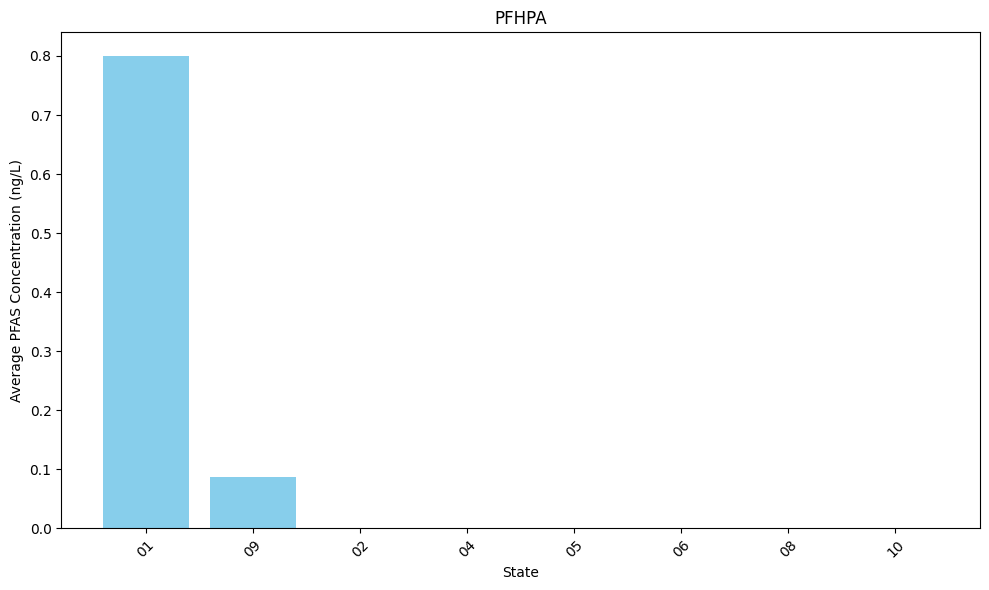

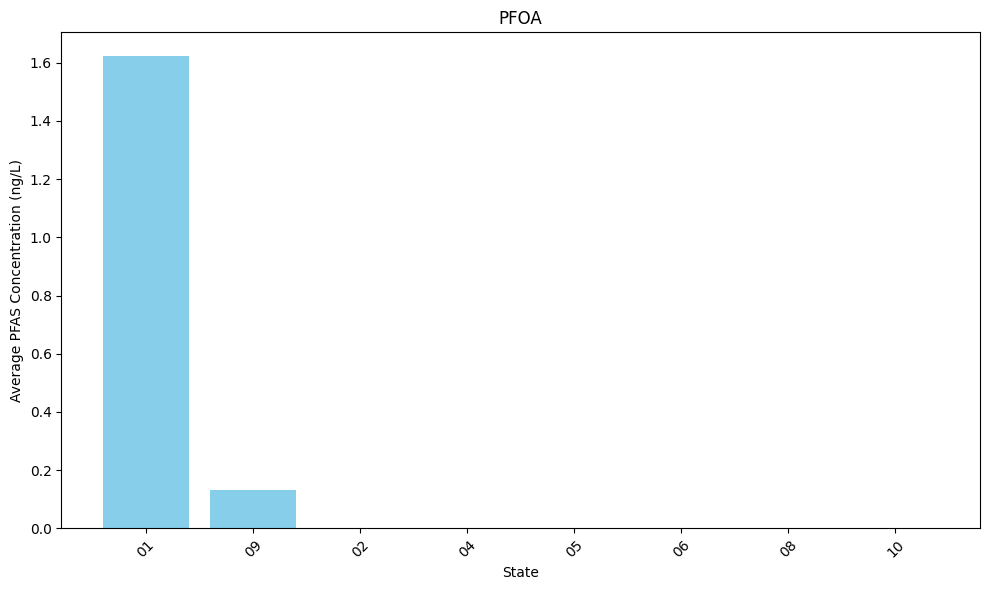

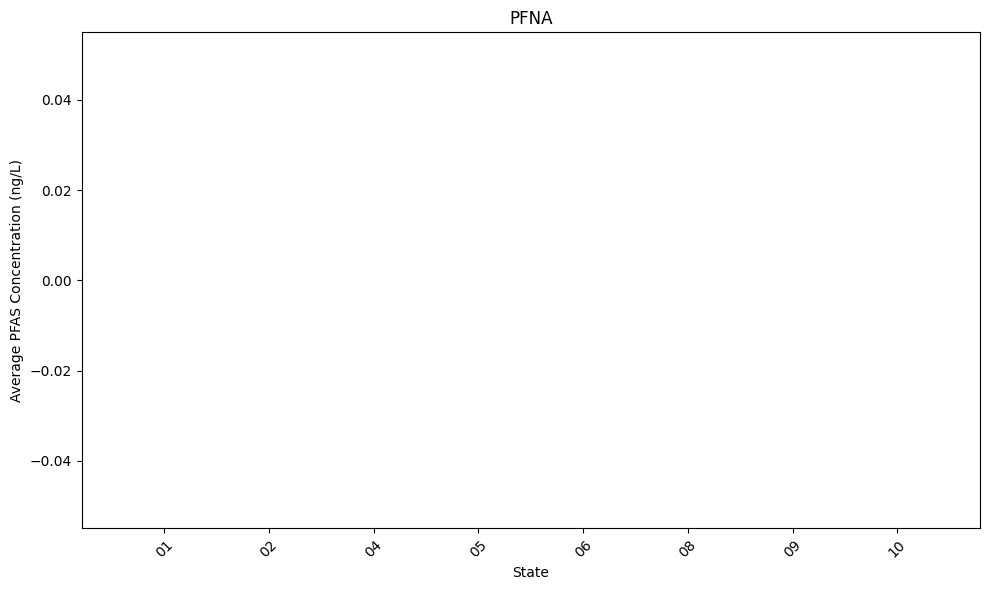

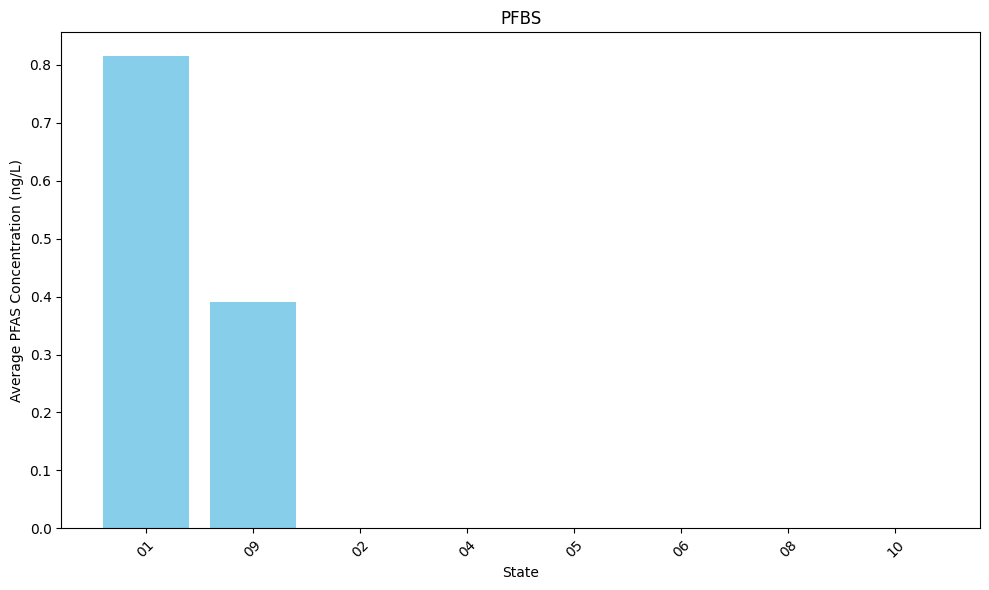

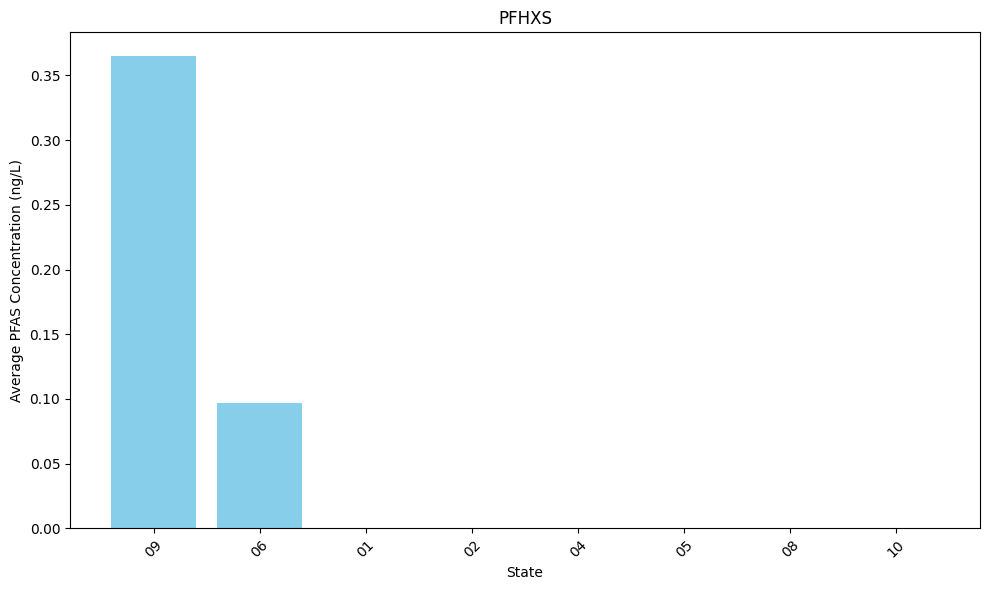

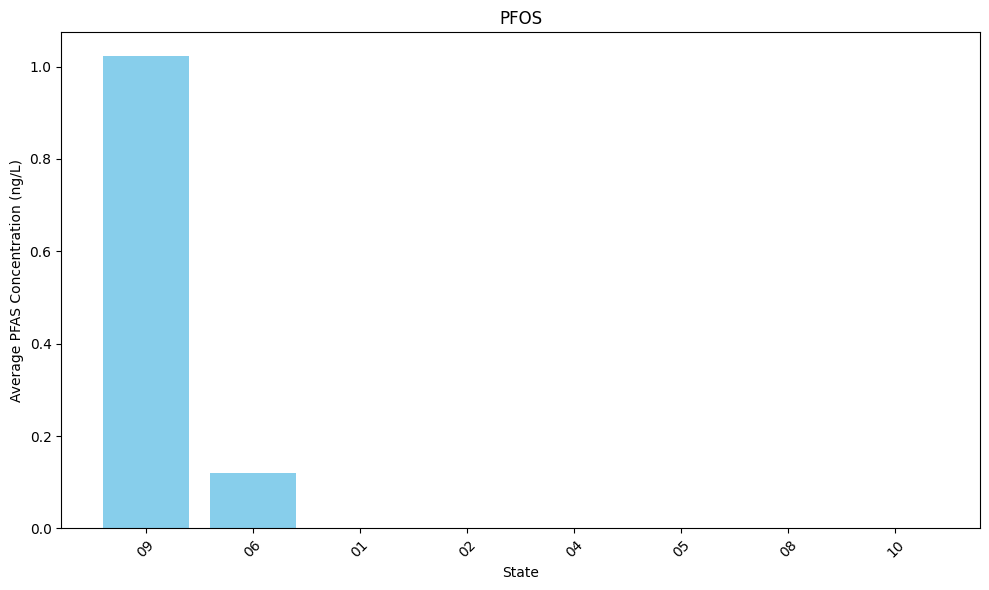

In [29]:
for analyte in pfas_analytes:
    # Sort the dataframe by the analyte concentration from high to low
    sorted_df = pivot_num.sort_values(by=analyte, ascending=False)
    
    # Plot the bar chart with a single color for all bars
    plt.figure(figsize=(10, 6))
    plt.bar(
        sorted_df['state'], 
        sorted_df[analyte], 
        color='skyblue',  # Specify the color you want
    )
    
    plt.xlabel('State')
    plt.ylabel('Average PFAS Concentration (ng/L)')
    plt.title(analyte)
    plt.xticks(rotation=45)  # Rotate state labels for better readability
    plt.tight_layout()
    plt.show()

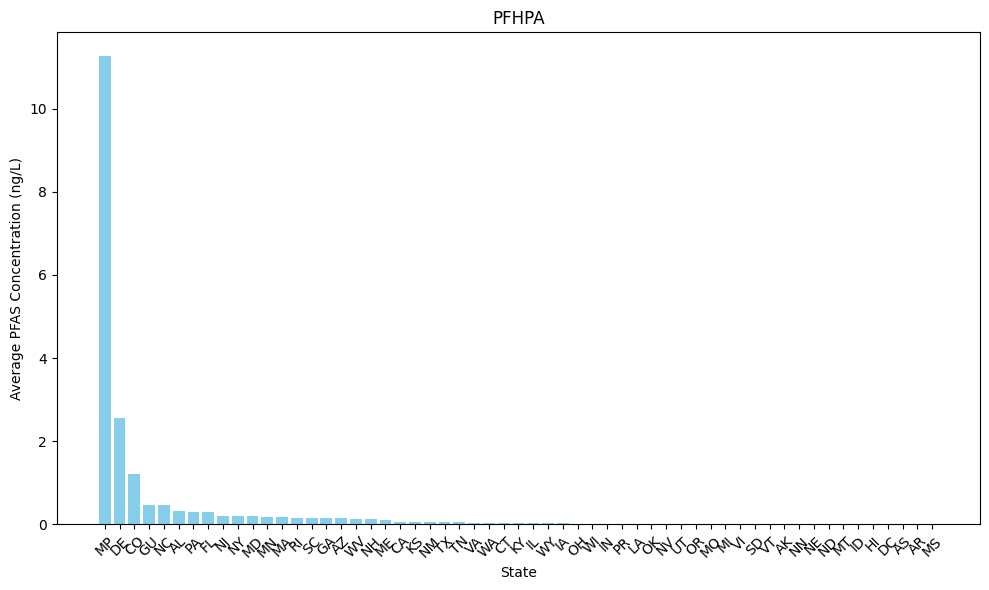

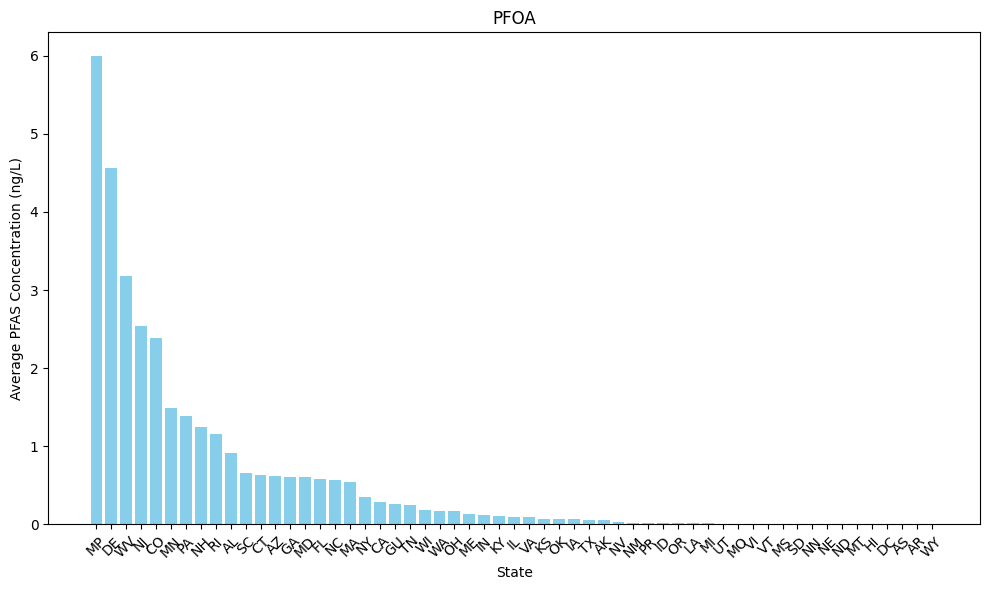

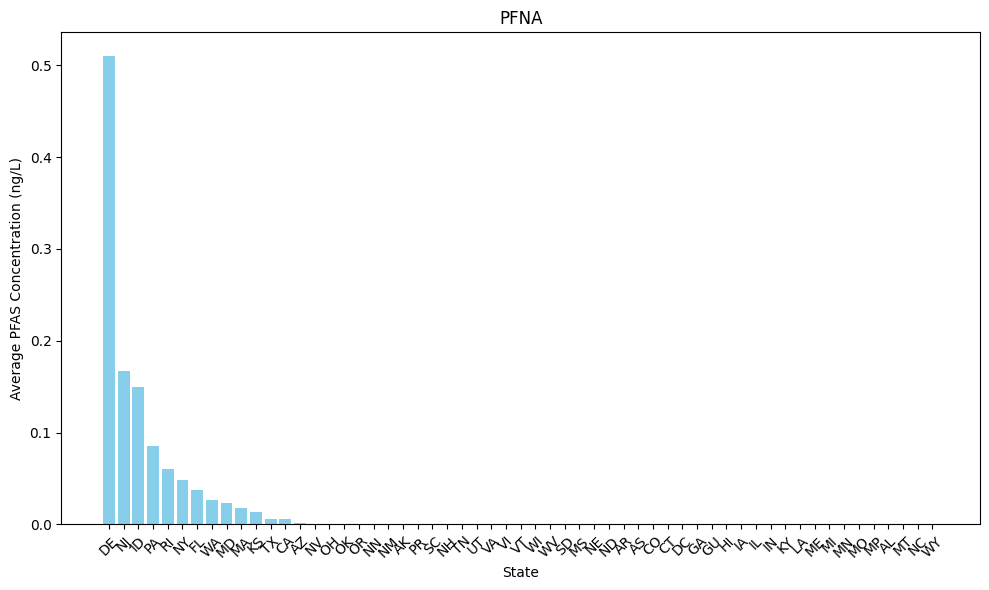

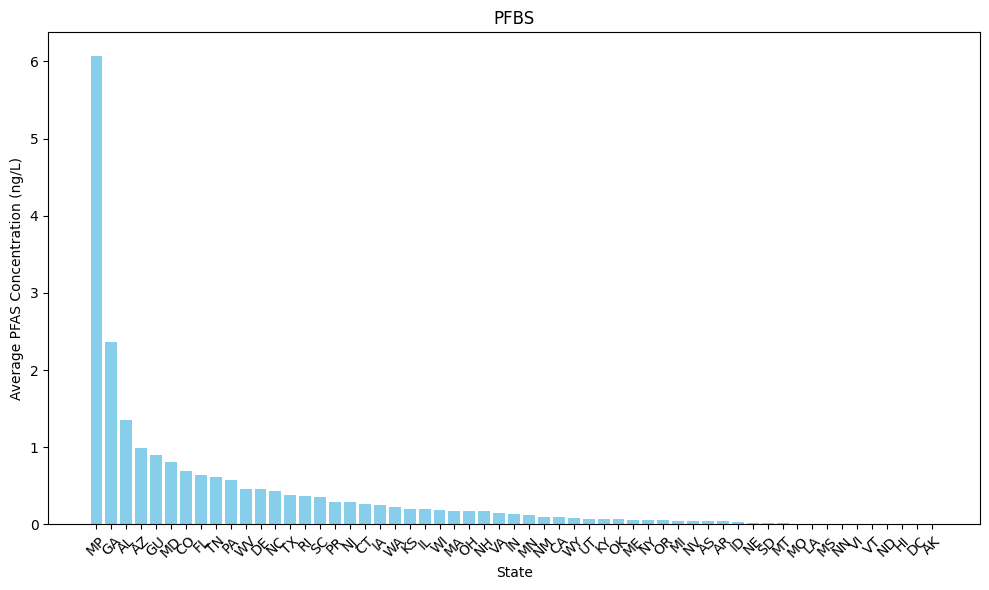

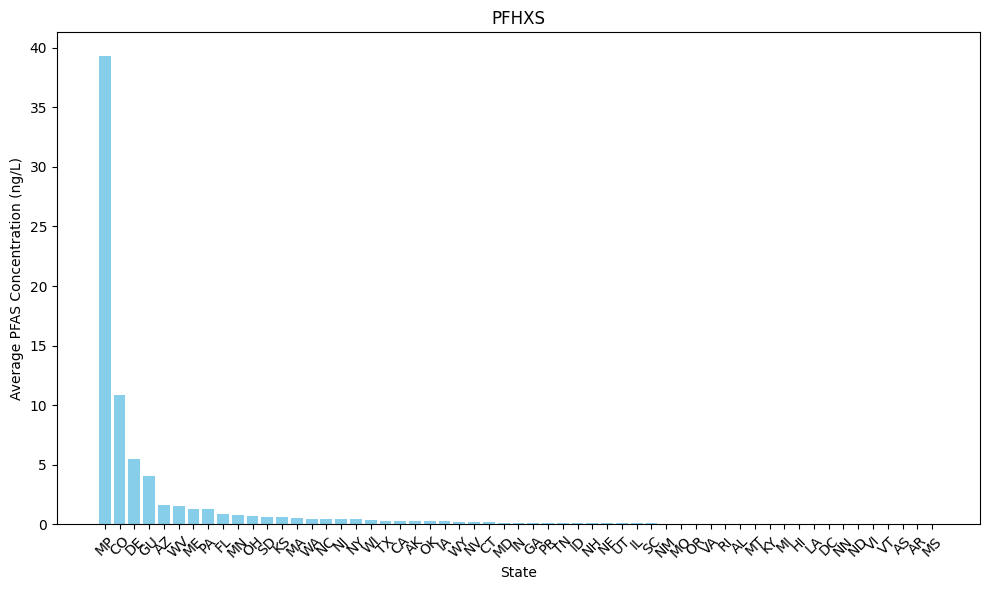

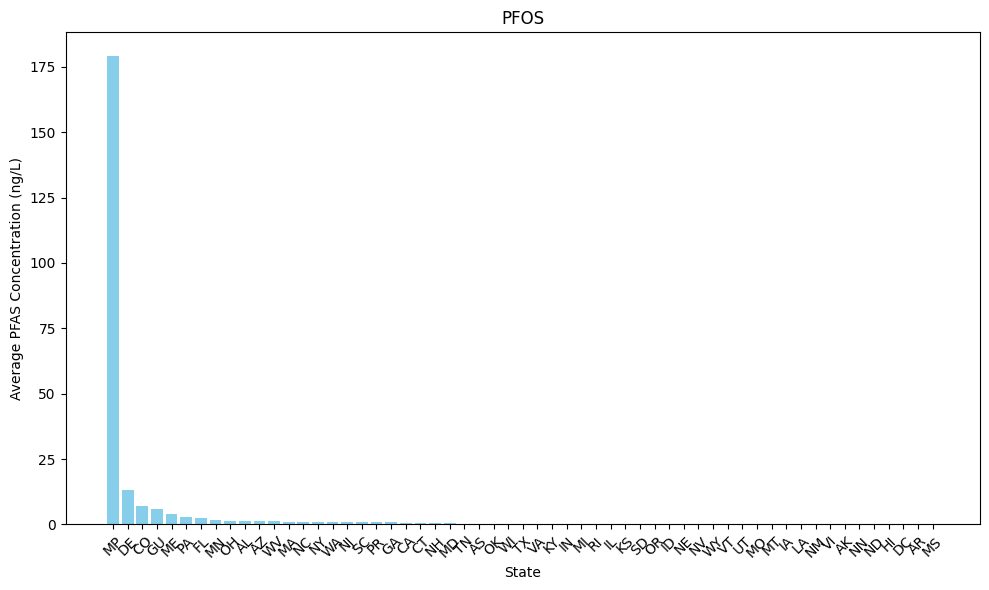

In [30]:
for analyte in pfas_analytes:
    # Sort the dataframe by the analyte concentration from high to low
    sorted_df = pivot_abbr.sort_values(by=analyte, ascending=False)
    
    # Plot the bar chart with a single color for all bars
    plt.figure(figsize=(10, 6))
    plt.bar(
        sorted_df['state'], 
        sorted_df[analyte], 
        color='skyblue',  # Specify the color you want
    )
    
    plt.xlabel('State')
    plt.ylabel('Average PFAS Concentration (ng/L)')
    plt.title(analyte)
    plt.xticks(rotation=45)  # Rotate state labels for better readability
    plt.tight_layout()
    plt.show()

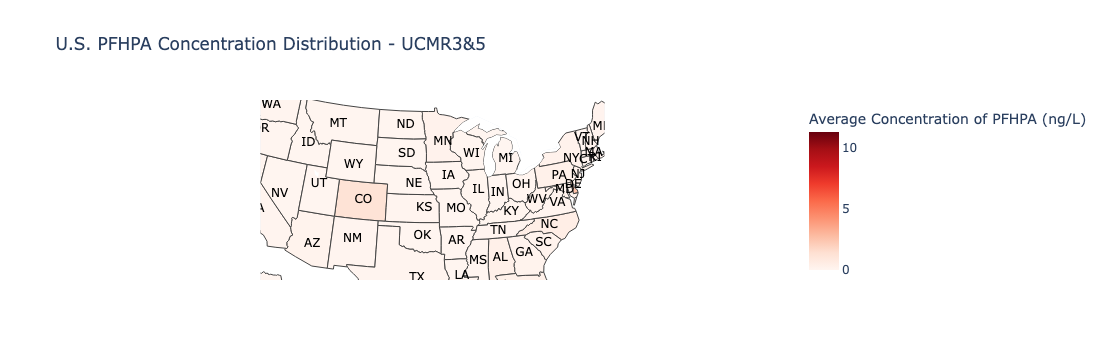

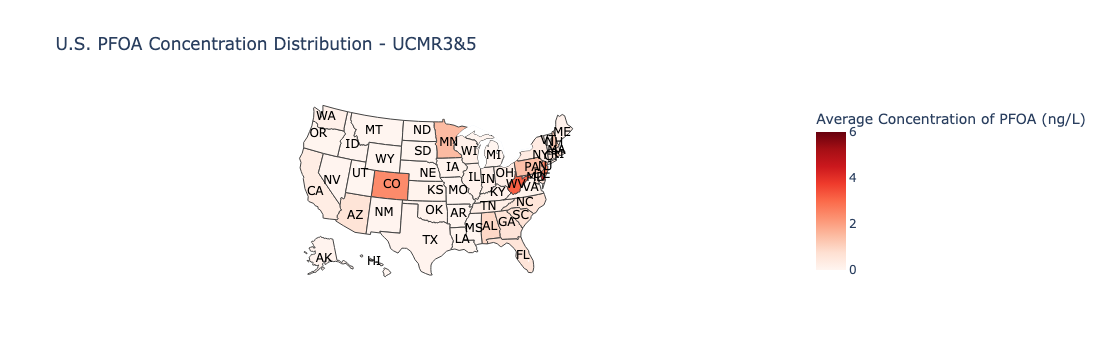

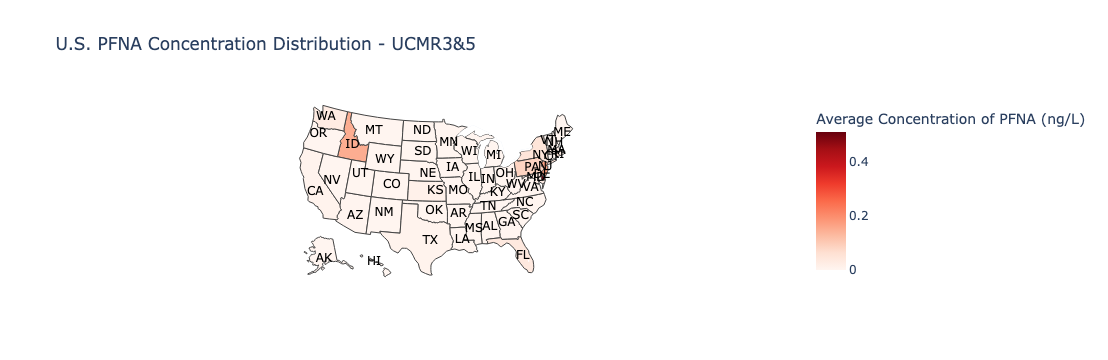

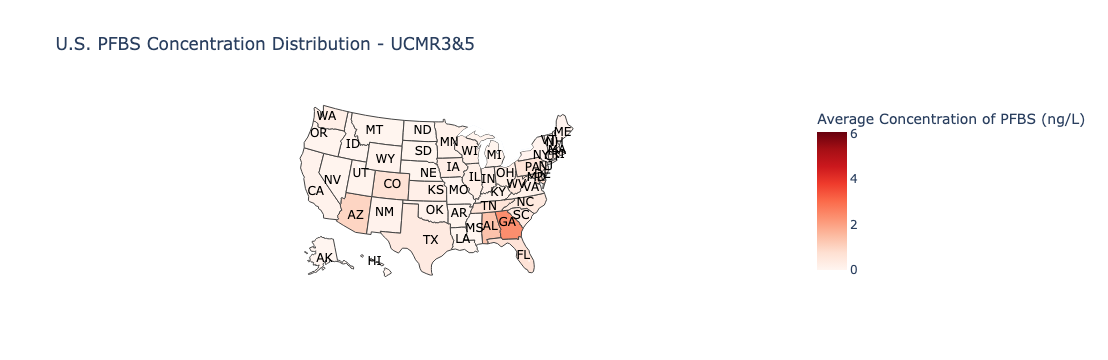

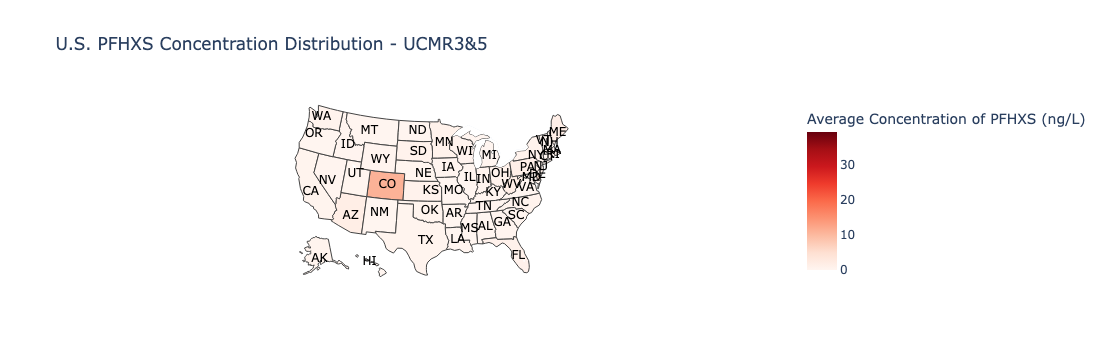

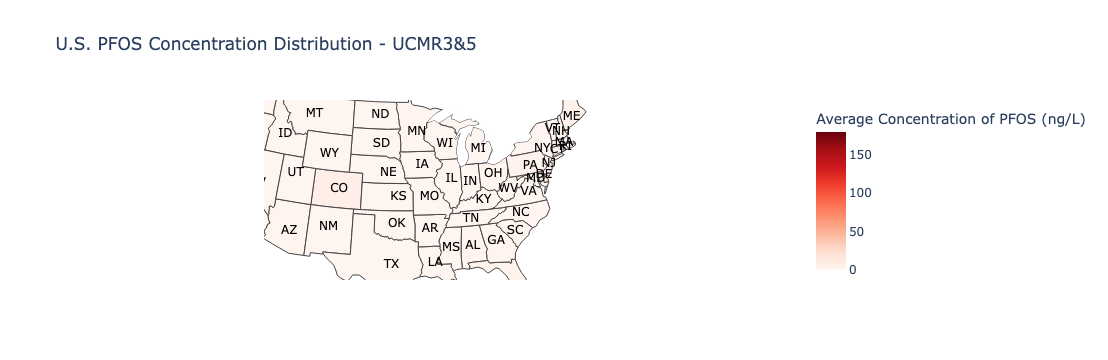

In [309]:
for analyte in pfas_analytes:
    fig = px.choropleth(
        pivot_abbr, 
        locations='state',  # The column with state abbreviations (e.g., 'CA', 'TX')
        locationmode="USA-states",  # Use the USA state map
        color=analyte,  # The PFAS analyte column to visualize
        hover_name='state',  # The column to show on hover (state names)
        scope="usa",  # Focus the map on the USA
        color_continuous_scale="Reds",  # Color scale for concentrations
        labels={analyte: f'Average Concentration of {analyte} (ng/L)'},
        title=f'U.S. {analyte} Concentration Distribution'
    )
    
    # Customize the layout
    fig.update_layout(
        title_text=f'U.S. {analyte} Concentration Distribution - UCMR3&5',
        geo=dict(
            lakecolor='rgb(255, 255, 255)',  # Set the color of lakes to white
        )
    )

    # Add state code annotations
    for state, coords in state_coordinates.items():
        fig.add_trace(go.Scattergeo(
            locationmode='USA-states',
            lon=[coords[1]],
            lat=[coords[0]],
            text=state,
            mode='text',
            showlegend=False,
            textfont=dict(
                size=12,
                color='black'
            )
        ))
    fig.write_html(f'{analyte}_concentration_map_ucmr3&5.html')
    # Show the map
    fig.show()

In [304]:
ucmr_df['sampling_date'] = pd.to_datetime(ucmr_df['sampling_date'])

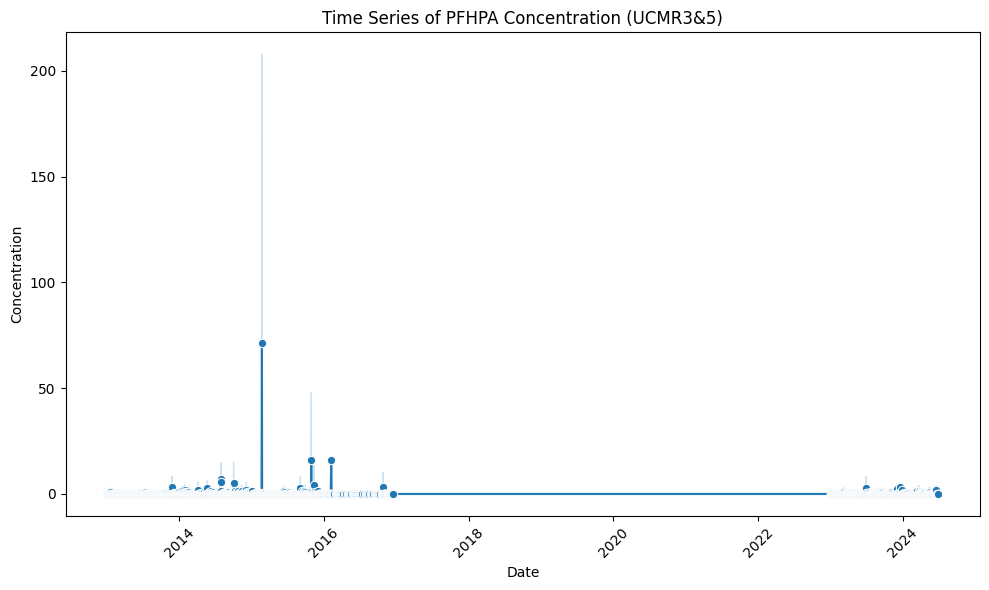

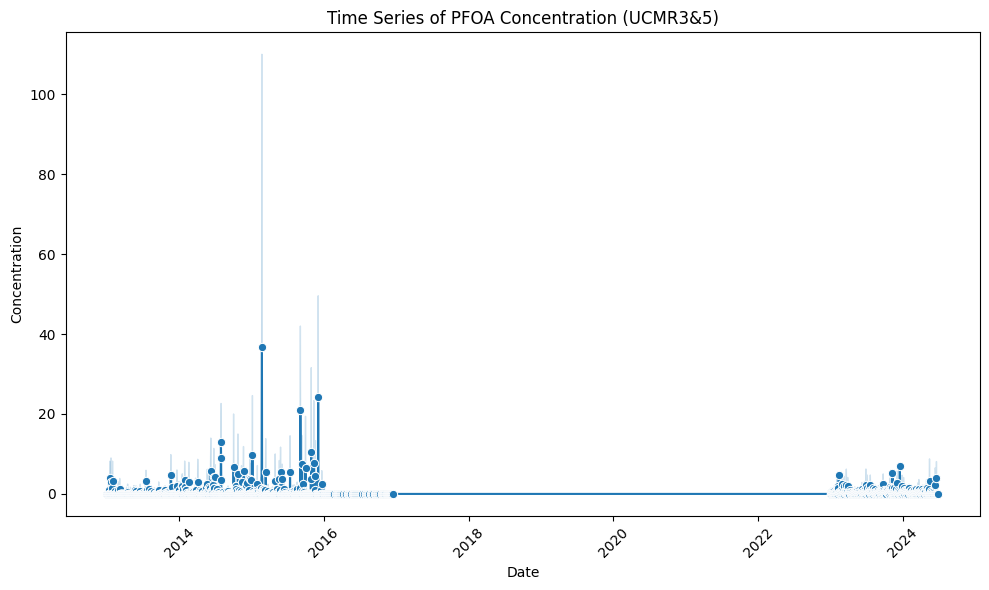

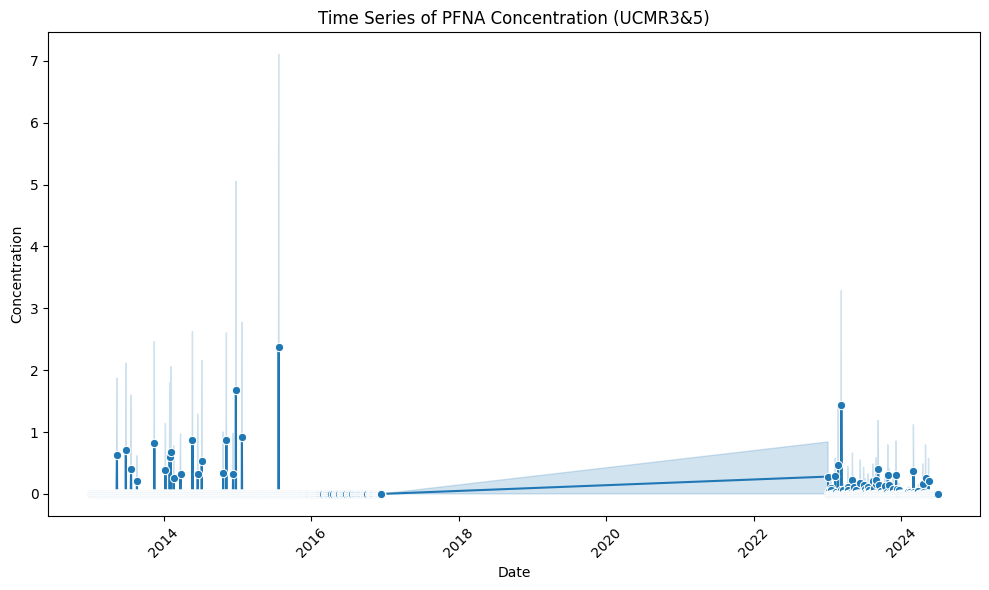

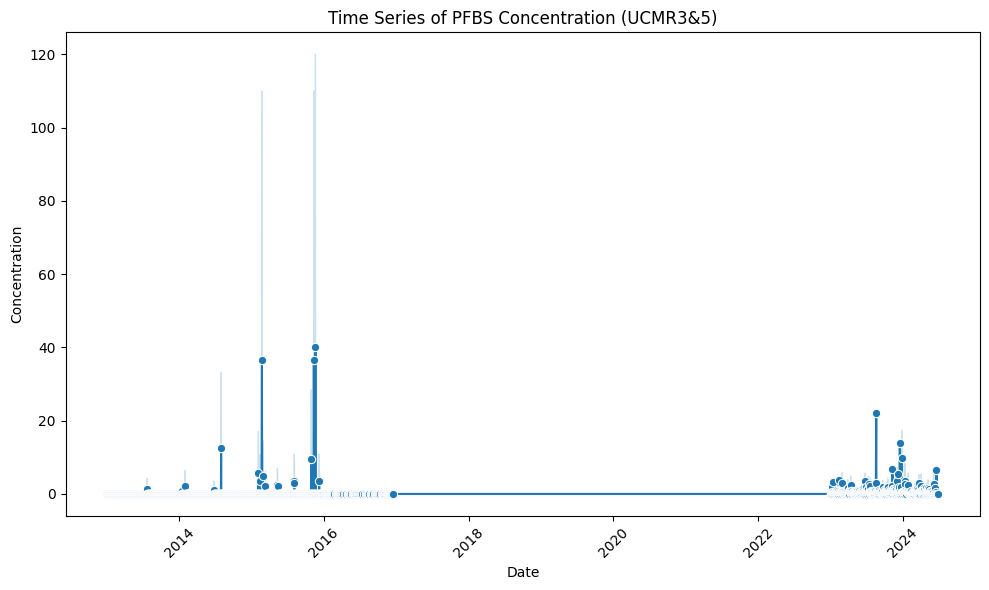

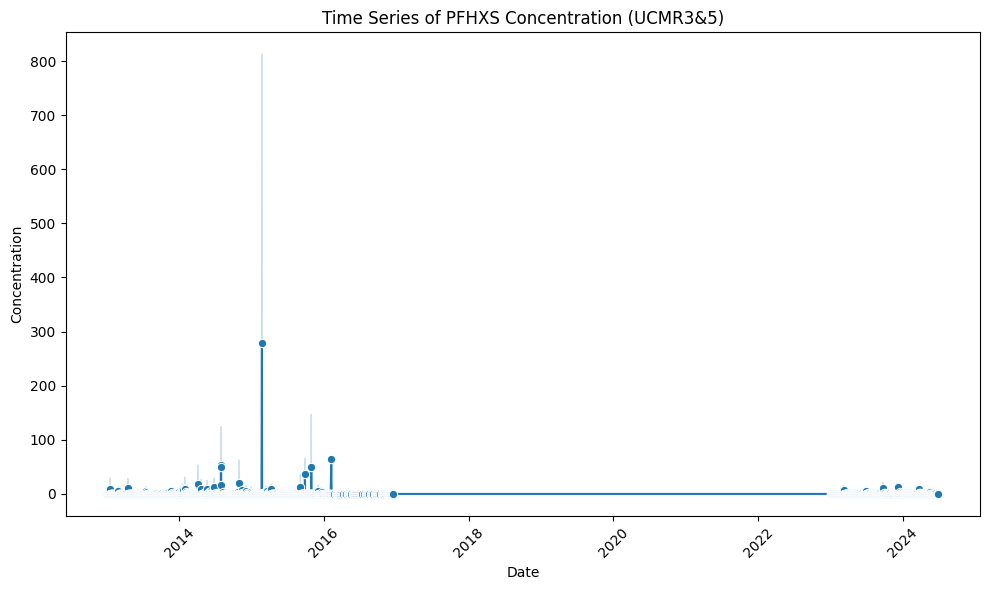

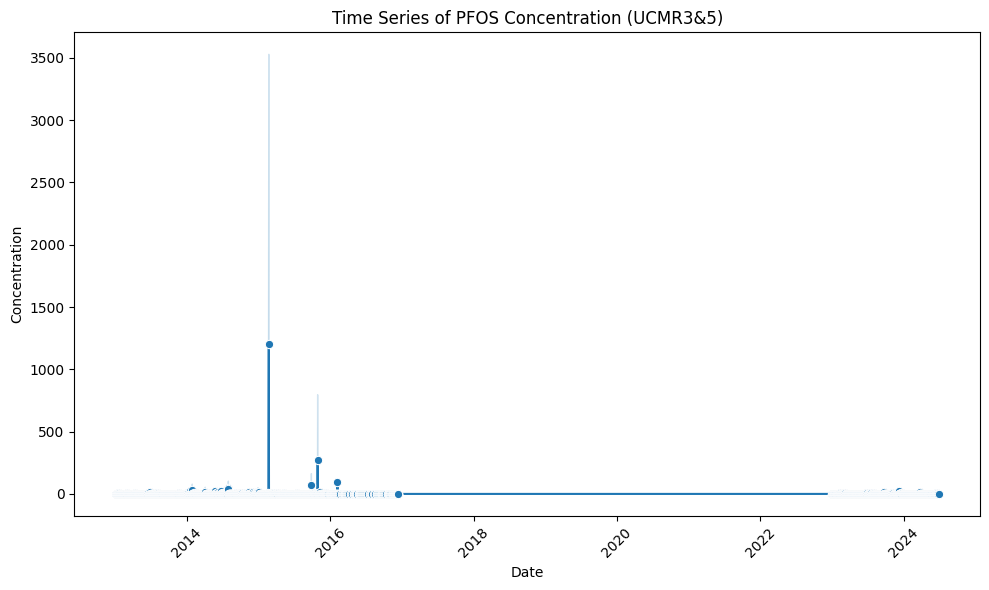

In [308]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

for analyte in pfas_analytes:
    plt.figure(figsize=(10, 6))
    
    # Filter data for the current analyte
    analyte_df = ucmr_df[ucmr_df['analyte'] == analyte]
    
    # Plotting the time series for the current analyte
    sns.lineplot(data=analyte_df, x='sampling_date', y='concentration', marker='o')
    
    # Adding titles and labels
    plt.title(f'Time Series of {analyte} Concentration (UCMR3&5)')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    
    # Set x-axis to automatically adjust date labels
    ax = plt.gca()
    locator = mdates.AutoDateLocator()  # Automatically determines tick locations
    formatter = mdates.ConciseDateFormatter(locator)  # Concisely formats the date labels
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()
